# Posible ways of improving retail banking

# Portuguese-Bank-Marketing
The project aims to analyze the Portuguese Bank Marketing dataset and predict weather the client will subscribed to the term deposit.


Data Set Information:
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

# Data Set Information:
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

# Attribute Information:


Input variables:



# bank client data: 
1 - age (numeric) 

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed', 'services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)  
4-   education (categorical: 'basic.4y',   'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree','unknown') 
5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown') 

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

# related with the last contact of the current campaign:

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
    
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
    
14 - previous: number of contacts performed before this campaign and for this client (numeric)
    
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

# Output variable (desired target):


16 - y - has the client subscribed a term deposit? (binary: 'yes','no')

# IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from scipy.stats import shapiro , pearsonr
import statsmodels.api as sm
import warnings 
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import confusion_matrix

# user defined functions

In [2]:
def miss_val(x):
    miss_val =[]
    for i in x.columns:
        for j in x[i]:
            if x[x[i].isna()].shape[0]>=1:
                miss_val.extend(x[x[i].isna()].index)
    return miss_val

            
            
def univariate_outlier(x):
    q1 = df[x].describe().T["25%"]
    q3 = df[x].describe().T["75%"]
    iqr = q3-q1
    inner = q1 -1.5*iqr
    outer = q3 +1.5*iqr
    out=[]
    for i,j in df[x].iteritems():
        if inner<j<outer:
            pass
        else:
            out.append(j)
    return out

    
    
    
def feature_box_kde_normality(x):
    normality_test(df[x])
    out=univariate_outlier(x)
    if len(out)==0:
        print(f"There is no outlier in {x}")
    else:
        print("Outlier :",out)
    f,(ax1,ax2) = plt.subplots(1,2,figsize=[15,3])
    sns.boxplot(data=df,x=x,ax=ax1)
    sns.kdeplot(data=df,x=x,ax=ax2)
    
def normality_test(x):
    s,p = shapiro(x)
    print(f"The statistic value is {s} with p-value : {p}")
    if p>0.05:
        print(f"{x.name} is normally distributed")
    else:
        print(f"{x.name} is not normally distributed")
        
def missing_values(df):
    for i in df.columns:
        df[i].fillna(df[i].mode()[0],inplace=True)
        
def feature_analysis(x):
    a = df[x].unique()
    d = df[x].value_counts()
    b = df[x].value_counts(normalize = True)*100
    c = df[x].isna().sum()
    print('unique_values:', '\n', a, '\n', 'value_counts:','\n', d, '\n','proportion of value:', '\n', b, '\n','count of nan values:', c)
    
def count_plot(x):
    fig, (axis)  = plt.subplots(1, 1,figsize=(10,7))
    sns.countplot(x=df[x], data=df, ax=axis)
    plt.title('Count Plot for Categorical Variable ',x, fontsize = 15)

def high_frequency(x):
    fig, (axis) = plt.subplots(1,1, figsize = (10,7))
    sns.countplot(x= df[x], data = df, ax = axis)
    print('the variable with more frequency is', df[x].mode()[0])
    
def comparison_plot(x,y):
    fig,(axis1) = plt.subplots(1,1,figsize=(15,10))
    sns.countplot(x=df[x], hue= y ,data=df, ax = axis1)
    plt.show()
    
def multi_comparison (x,y,z):
    fig, (axis1)  = plt.subplots(1, 1,figsize=(20,10))
    sns.barplot(x=df[x], y= df[y], hue=df[z], data=df, ax=axis1)
    

def cat_dtype_change(x):
    df[x]= df[x].astype('object')
    df[x].info()
    
    
def train_test(x,y):
    x_encoded = pd.get_dummies(x, drop_first=True)
    scaler = StandardScaler()
    scaler.fit(x_encoded)
    x1 = scaler.fit_transform(x_encoded)
    x_train, x_test, y_train, y_test = train_test_split(x1, y, test_size=0.3, random_state=45)
    
def model_build(x_train, y_train):
    Logit_Model = LogisticRegression()
    Logit_Model.fit(x_train,y_train)
    decision_tree = DecisionTreeClassifier(criterion = 'entropy')
    decision_tree.fit(x_train,y_train)
    random_forest = RandomForestClassifier(n_estimators=10)
    random_forest.fit(x_train, y_train)
    models = {'logis': Logit_Model, 'decision tree': decision_tree, 'random_forest': random_forest}
    return models

def results(x_train, x_test, y_train, y_test, models):
    for model_name , model in models.items():
        train_pred = model.predict(x_train)
        print('training results', model_name)
        print(classification_report(y_train, train_pred))
        cm= confusion_matrix(y_train, train_pred)
        print('Confusion matrix')
        print('/n')
        print(cm)
    
        print('Test Results')
        test_pred = model.predict(x_test)
        print(classification_report(y_test, test_pred))
        cm =confusion_matrix(y_test, test_pred)
        print('Confusion matrix')
        print(cm)


        print("---------------------------------------------------")
    

# LOAD DATASET

In [7]:
df =pd.read_csv('bank-full.csv', sep =';')

In [8]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [9]:
# it gives the information about the dataset and also datatypes of columns/variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [10]:
# it gives the hw man rows and columns in a dataset
df.shape

(45211, 17)

# MISSING VALUES

In [11]:
# we have to check whether there is a missing values in the dataset if there is missing values impute them with mode 
 #mode is for both categorical and numerical data 

In [12]:
# We use this "isna function" to find missing values inthe data otherwise called as nan values
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [13]:
# to find the proportion of the missing values we use this function
df.isna().sum()/df.shape[0]*100

age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
contact      0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
pdays        0.0
previous     0.0
poutcome     0.0
y            0.0
dtype: float64

# there is no missing values in the dataset

# split into numerical and categorical data as per the dataset

In [14]:
# we have to first find the what are the categorical and numerical as per the dataset 
num = df.select_dtypes(exclude = 'object')
cat = df.select_dtypes(include= 'object')

In [15]:
cat

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no
...,...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,no,no,cellular,nov,unknown,yes
45207,retired,divorced,primary,no,no,no,cellular,nov,unknown,yes
45208,retired,married,secondary,no,no,no,cellular,nov,success,yes
45209,blue-collar,married,secondary,no,no,no,telephone,nov,unknown,no


In [16]:
# replacing "unknown" with the mode
for column in cat:
    mode= df[column].mode()[0]
    df[column]= df[column].replace("unknown", mode)

In [17]:
num

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0
...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0
45207,71,1729,17,456,2,-1,0
45208,72,5715,17,1127,5,184,3
45209,57,668,17,508,4,-1,0


# DESCRIPTIVE STATISTICS OF NUMERICAL DATA

In [18]:
num.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [19]:
# TARGET VARIABLE 

feature_analysis('y')

unique_values: 
 ['no' 'yes'] 
 value_counts: 
 no     39922
yes     5289
Name: y, dtype: int64 
 proportion of value: 
 no     88.30152
yes    11.69848
Name: y, dtype: float64 
 count of nan values: 0


***DATASET IS NOT BALANCED. TO ACCURACY IS NOT PROPER WAY GO TO OTHER MERTICS***

# EDA

# LETS UNDERSTAND CAMPAIGN BENEFITS 

In [20]:
pre_cam = df['poutcome'].value_counts(normalize = True)*100
pre_cam

unknown    81.747805
failure    10.840282
other       4.069806
success     3.342107
Name: poutcome, dtype: float64

***in previous outcome there is lot of failures and non-existent happends***

In [21]:
cur_cam = df['y'].value_counts(normalize = True)*100
#.value_counts(normalize = True)*100
cur_cam

no     88.30152
yes    11.69848
Name: y, dtype: float64

In [22]:
print('previous_campaign results success rate: 3%')

print('current campaign results success rate : 11%')

previous_campaign results success rate: 3%
current campaign results success rate : 11%


there is change in previous and current campaign 

# WHAT ARE THE REASONS FOR THIS FAILURE IN PREVIOUS CAMPAIGN LET US SEE

In [23]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

# AGE

In [24]:
df.age.info()

<class 'pandas.core.series.Series'>
RangeIndex: 45211 entries, 0 to 45210
Series name: age
Non-Null Count  Dtype
--------------  -----
45211 non-null  int64
dtypes: int64(1)
memory usage: 353.3 KB


In [25]:
df['age'].value_counts(normalize = True)*100

32    4.611710
31    4.414855
33    4.361770
34    4.268873
35    4.189246
        ...   
93    0.004424
90    0.004424
95    0.004424
88    0.004424
94    0.002212
Name: age, Length: 77, dtype: float64

***form the above age group between 31 and 34 are more than other age group***

<AxesSubplot:xlabel='age', ylabel='Count'>

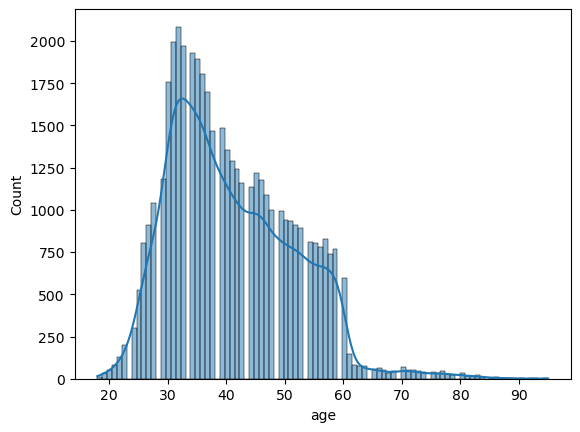

In [28]:
sns.histplot(df['age'], kde = True)

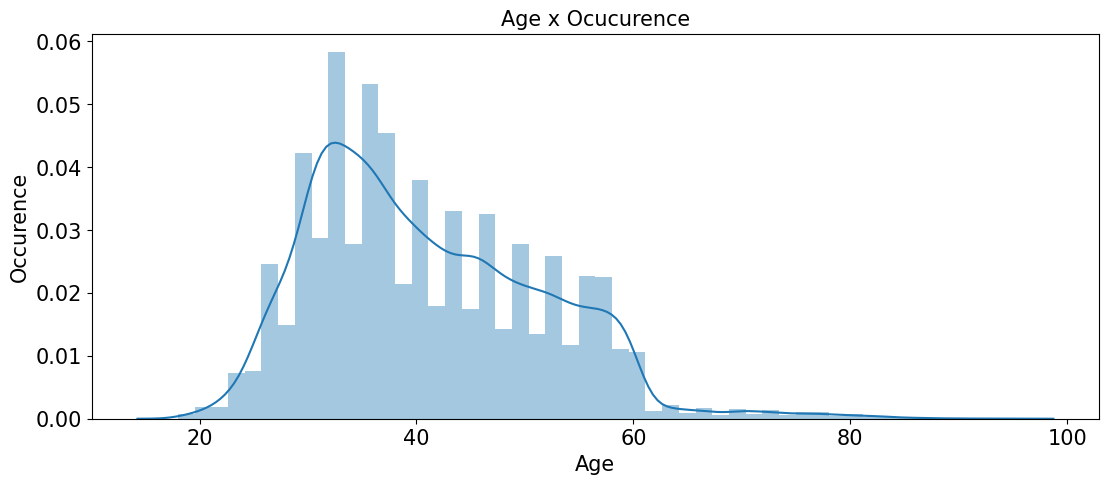

In [29]:
fig, (ax1) = plt.subplots(1,1,figsize = (13, 5))
sns.distplot(df['age'], ax = ax1, kde = True)
ax1.set_xlabel('Age', fontsize=15)
ax1.set_ylabel('Occurence', fontsize=15)
ax1.set_title('Age x Ocucurence', fontsize=15)
ax1.tick_params(labelsize=15)

The statistic value is 0.9605457782745361 with p-value : 0.0
age is not normally distributed
Outlier : [83, 75, 75, 83, 75, 72, 71, 76, 83, 71, 85, 72, 90, 71, 82, 73, 74, 71, 75, 78, 85, 80, 71, 78, 73, 75, 94, 72, 83, 79, 78, 83, 73, 76, 83, 77, 73, 74, 73, 77, 71, 71, 80, 82, 75, 77, 78, 78, 86, 76, 72, 74, 77, 74, 79, 71, 74, 78, 73, 73, 95, 74, 71, 78, 71, 75, 75, 82, 74, 81, 76, 72, 75, 72, 71, 72, 77, 73, 85, 83, 78, 73, 79, 71, 71, 80, 72, 78, 79, 71, 82, 81, 79, 71, 79, 79, 73, 75, 72, 71, 75, 78, 75, 80, 80, 74, 73, 71, 72, 72, 77, 79, 73, 71, 80, 71, 83, 71, 73, 78, 72, 81, 81, 71, 74, 75, 82, 80, 76, 74, 74, 77, 71, 71, 77, 76, 72, 74, 74, 72, 73, 82, 77, 71, 79, 89, 76, 81, 74, 73, 71, 71, 77, 72, 84, 86, 72, 72, 76, 73, 74, 82, 71, 83, 72, 73, 73, 74, 72, 78, 86, 76, 79, 71, 81, 77, 82, 72, 73, 73, 74, 71, 73, 76, 71, 71, 83, 71, 80, 79, 77, 74, 84, 95, 77, 78, 79, 83, 83, 73, 77, 72, 74, 83, 76, 73, 81, 80, 75, 74, 75, 77, 83, 72, 81, 73, 74, 80, 72, 76, 72, 77, 74, 87, 

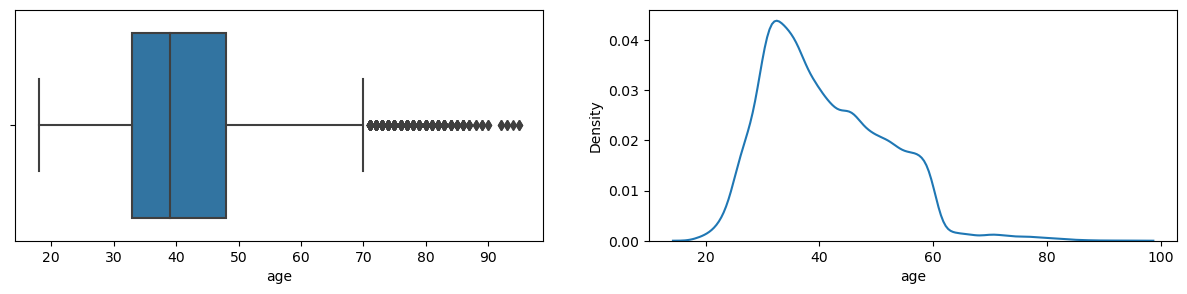

In [30]:
feature_box_kde_normality('age')

***IT IS NOT NORMALLY DISTRIBUTED BECAUSE OF SOME OUTLIERS***

In [31]:
outlier = [78, 71, 77, 80, 81, 71, 79, 76, 82, 82, 81, 73, 85, 85, 74, 86, 76, 83, 88, 70, 71, 87, 73, 71, 80, 71, 73, 84, 75, 71, 73, 81, 73, 71, 78, 80, 78, 70, 72, 77, 71, 86, 88, 78, 73, 74, 84, 77, 76, 72, 81, 74, 73, 77, 72, 73, 71, 82, 77, 75, 78, 74, 73, 88, 70, 74, 79, 70, 72, 78, 71, 81, 79, 71, 75, 71, 75, 72, 82, 71, 70, 85, 72, 76, 75, 70, 72, 71, 80, 80, 70, 86, 70, 70, 75, 74, 89, 72, 83, 80, 74, 83, 78, 88, 86, 83, 72, 73, 83, 81, 72, 83, 79, 76, 88, 75, 71, 81, 78, 81, 88, 84, 88, 70, 73, 79, 82, 72, 80, 82, 80, 83, 80, 88, 78, 85, 70, 81, 81, 80, 88, 72, 73, 73, 71, 70, 79, 85, 88, 77, 74, 75, 73, 71, 75, 76, 70, 70, 71, 71, 78, 80, 76, 82, 78, 73, 70, 75, 85, 71, 74, 76, 77, 79, 74, 91, 85, 77, 80, 73, 85, 70, 73, 74, 78, 72, 78, 71, 71, 72, 76, 82, 79, 73, 83, 76, 80, 71, 75, 70, 80, 77, 78, 88, 77, 82, 71, 73, 73, 76, 77, 76, 84, 72, 82, 76, 76, 74, 74, 70, 72, 77, 72, 70, 73, 80, 71, 76, 80, 76, 76, 80, 76, 76, 71, 70, 79, 75, 71, 82, 76, 78, 70, 70, 72, 76, 77, 73, 83, 71, 71, 71, 82, 72, 73, 70, 77, 72, 70, 71, 76, 80, 80, 79, 83, 76, 88, 73, 70, 71, 78, 72, 72, 76, 73, 71, 71, 72, 71, 72, 98, 72, 86, 78, 77, 71, 70, 71, 85, 78, 75, 83, 77, 78, 70, 82, 80, 72, 75, 76, 75, 75, 72, 79, 70, 70, 88, 71, 72, 70, 71, 80, 88, 73, 76, 71, 81, 74, 74, 70, 71, 74, 70, 73, 77, 76, 78, 70, 71, 77, 74, 80, 71, 89, 82, 80, 88, 74, 85, 85, 81, 70, 84, 81, 86, 71, 70, 74, 73, 83, 88, 88, 81, 72, 72, 74, 80, 71, 73, 70, 80, 72, 73, 82, 76, 70, 76, 80]
len(outlier)

368

In [32]:
# percentage of outliers in a list 

percentage_outliers = (len(outlier)/len(df)) *100

print(' percentage of outliers in a list',round(percentage_outliers,2))

 percentage of outliers in a list 0.81


In [33]:
print('minimum age:', df['age'].min())

print('maximum age:',df['age'].max())

print('median of age:', df['age'].median())

minimum age: 18
maximum age: 95
median of age: 39.0


<AxesSubplot:xlabel='age', ylabel='y'>

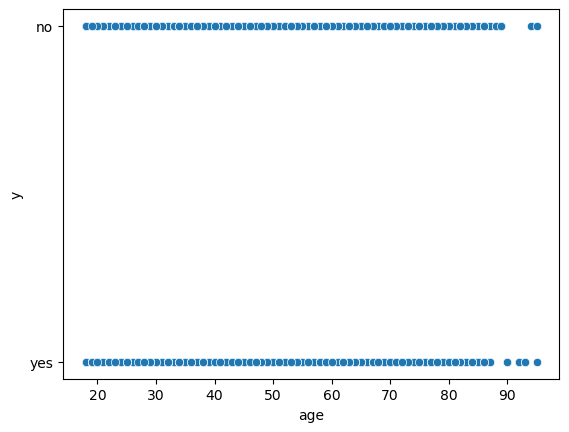

In [34]:
sns.scatterplot(df['age'], df['y'])

In [35]:
df[df['y']== 'yes'].age.value_counts(normalize= True)*100

32    4.178484
30    4.102855
33    3.970505
35    3.951598
31    3.894876
        ...   
87    0.056721
90    0.037814
92    0.037814
93    0.037814
95    0.018907
Name: age, Length: 74, dtype: float64

In [36]:
df['y'].value_counts(normalize= True)*100

no     88.30152
yes    11.69848
Name: y, dtype: float64

***IN THE AGE COLUMN maximum of age group between 32 and 35 are most willing to deposit amount.

In the current campaign result 11 % people are willing to deposit amount.

out of 11% people maximum contributors are age group between 32 to 35 .***

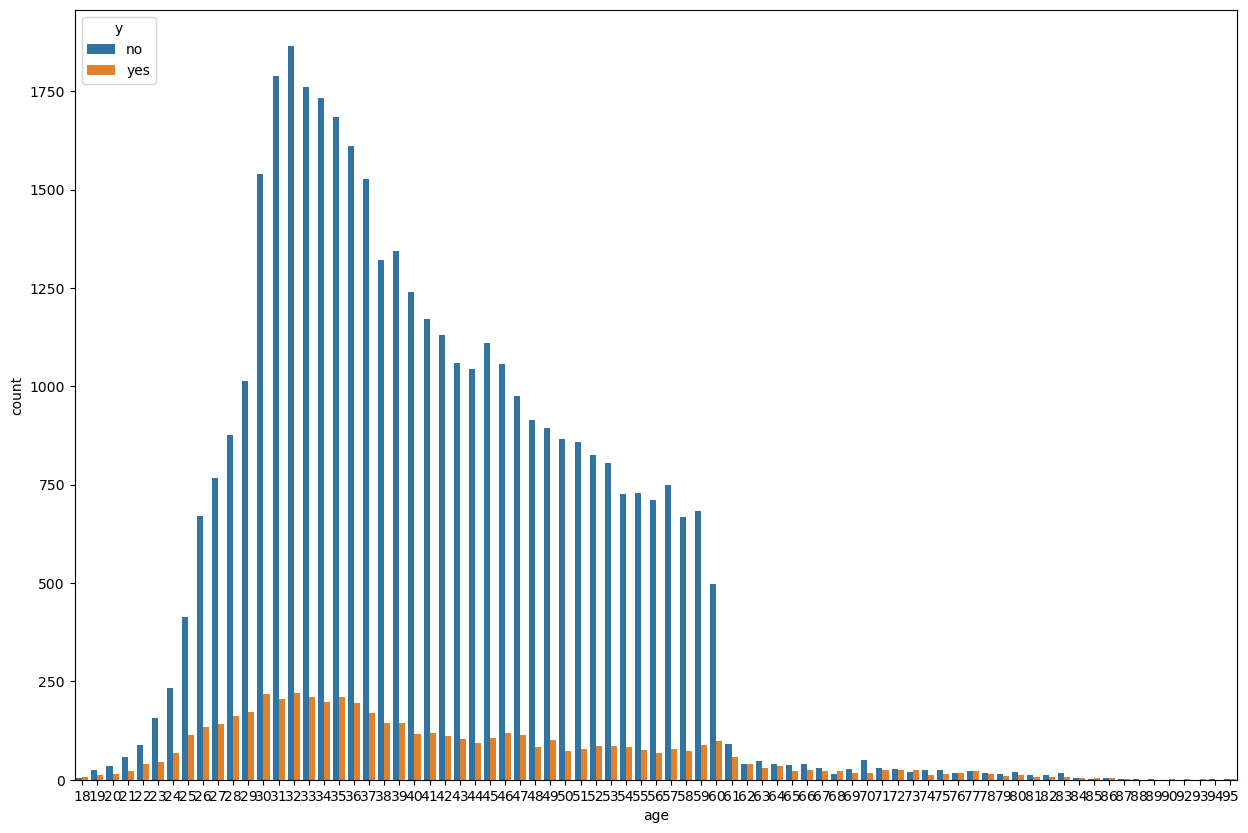

In [37]:
comparison_plot( 'age', 'y')

# previous campaign

In [38]:
pre_cam

unknown    81.747805
failure    10.840282
other       4.069806
success     3.342107
Name: poutcome, dtype: float64

<AxesSubplot:xlabel='age', ylabel='poutcome'>

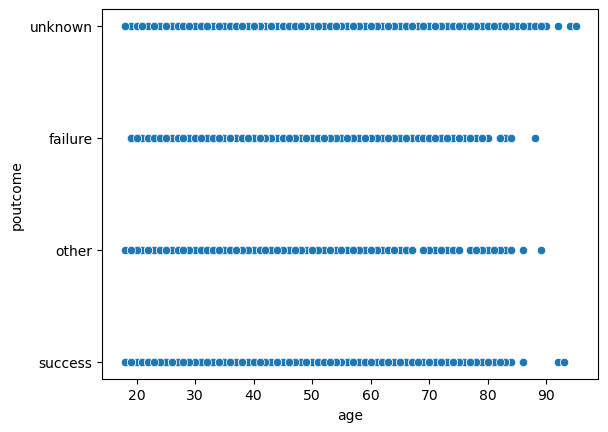

In [39]:
sns.scatterplot(df['age'], df['poutcome'])

In [40]:
df[df['poutcome']== 'success'].age.value_counts(normalize= True)*100

36    3.838518
31    3.838518
33    3.706155
34    3.706155
37    3.706155
        ...   
86    0.132363
93    0.132363
81    0.066181
92    0.066181
84    0.066181
Name: age, Length: 70, dtype: float64

***IN THE AGE COLUMN maximum of age group 30 to 40  are willing to deposit amount.  In the previous campaign result 2 % people are willing to deposit amount.  out of 2% people maximum contributors are age group 34. remaining are same in the percentage of contributors*** 

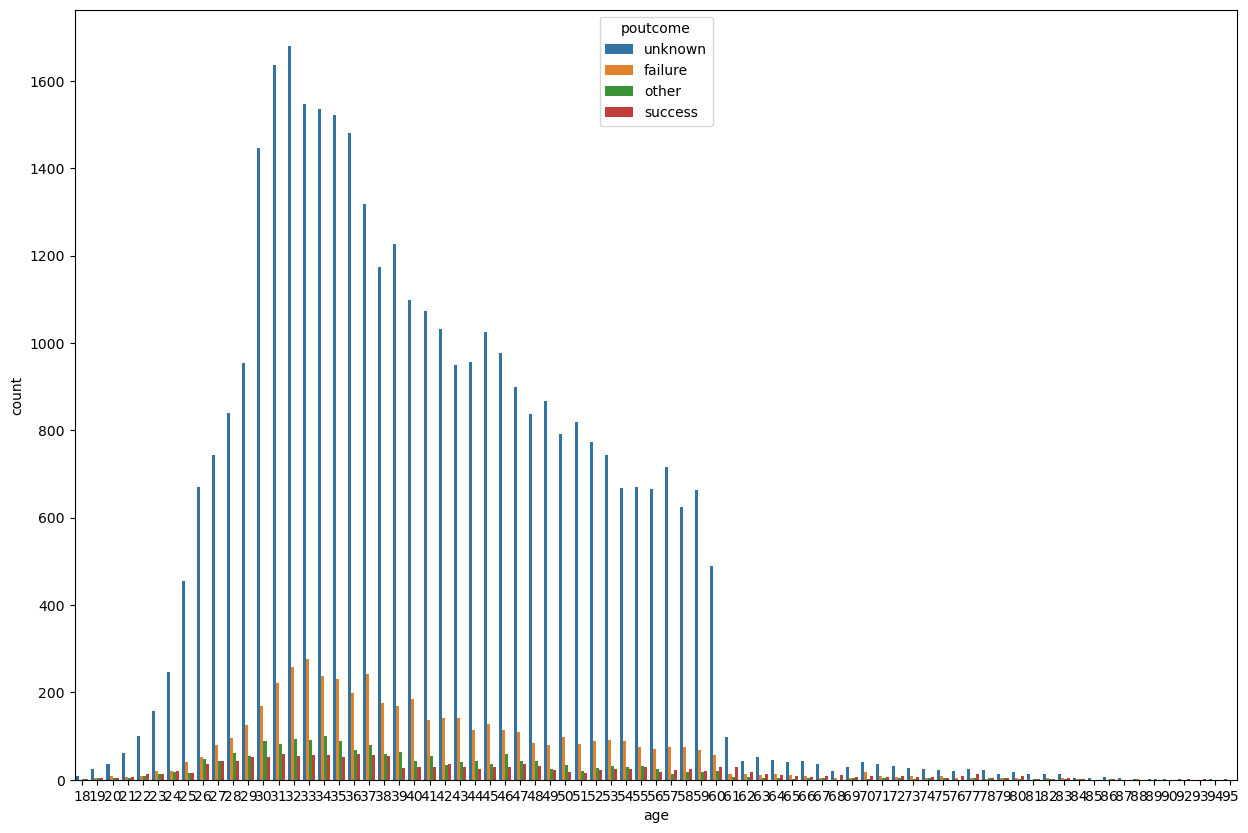

In [41]:
comparison_plot('age','poutcome')

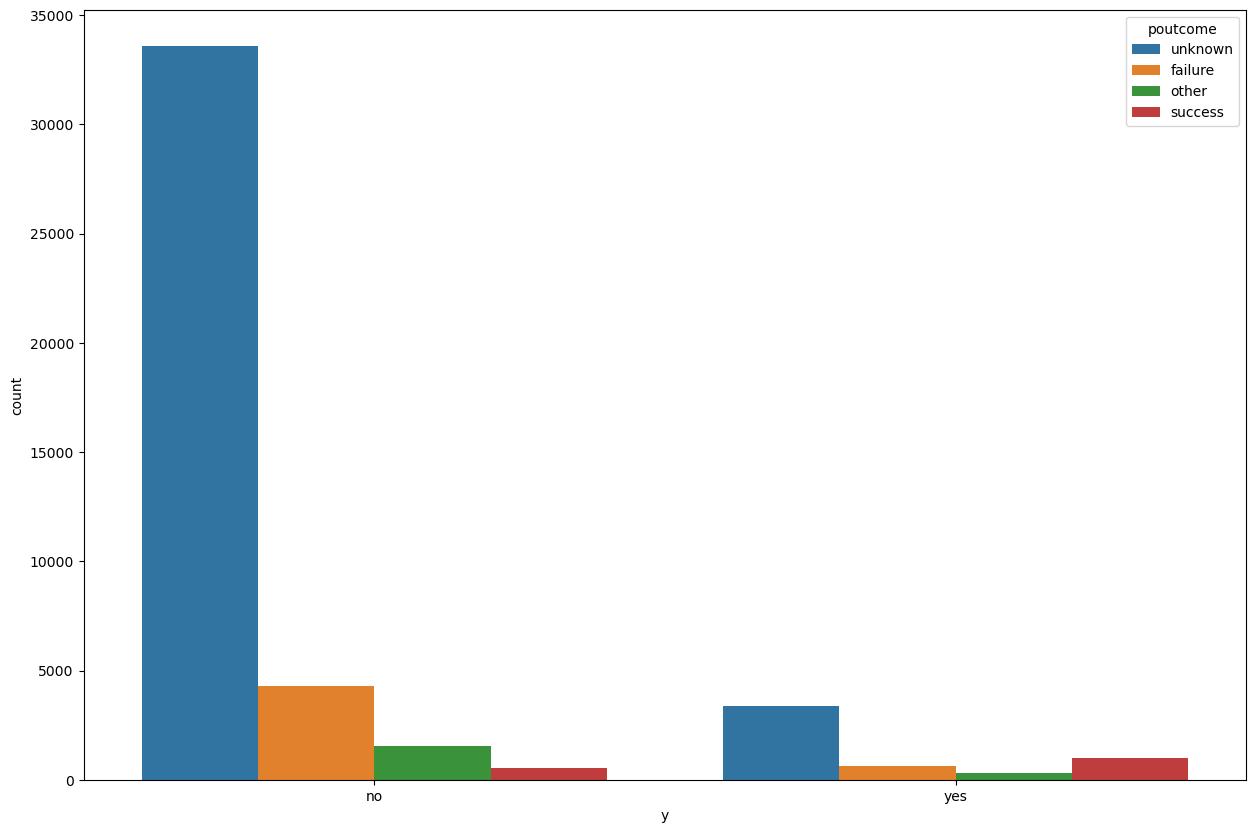

In [42]:
comparison_plot('y','poutcome')

in the previous campaign non existend are mostly current campaign also says no 

# JOB

In [43]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [44]:
feature_analysis('job')

unique_values: 
 ['management' 'technician' 'entrepreneur' 'blue-collar' 'retired' 'admin.'
 'services' 'self-employed' 'unemployed' 'housemaid' 'student'] 
 value_counts: 
 blue-collar      10020
management        9458
technician        7597
admin.            5171
services          4154
retired           2264
self-employed     1579
entrepreneur      1487
unemployed        1303
housemaid         1240
student            938
Name: job, dtype: int64 
 proportion of value: 
 blue-collar      22.162748
management       20.919688
technician       16.803433
admin.           11.437482
services          9.188029
retired           5.007631
self-employed     3.492513
entrepreneur      3.289023
unemployed        2.882042
housemaid         2.742695
student           2.074716
Name: job, dtype: float64 
 count of nan values: 0


the variable with more frequency is blue-collar


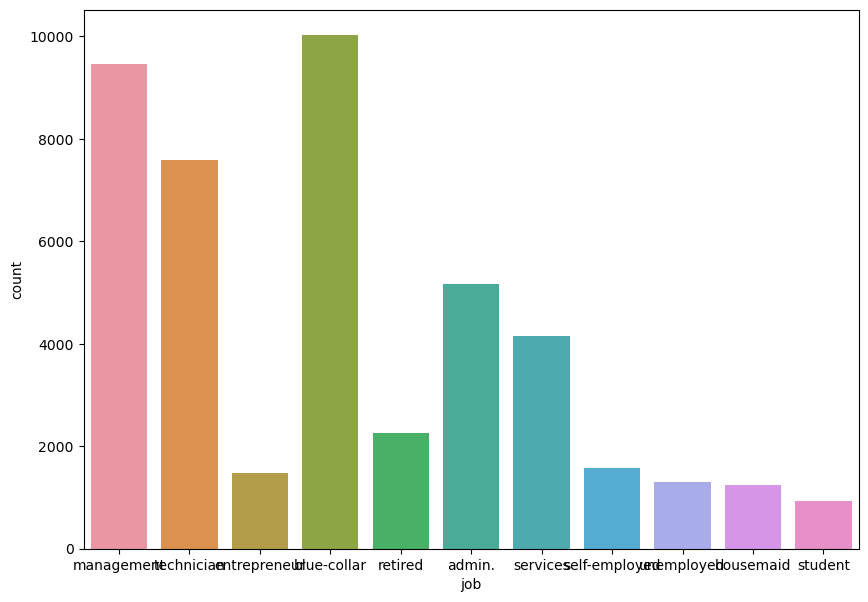

In [45]:
high_frequency('job')

# in the job column admin and blue-collar are more when compare to others 

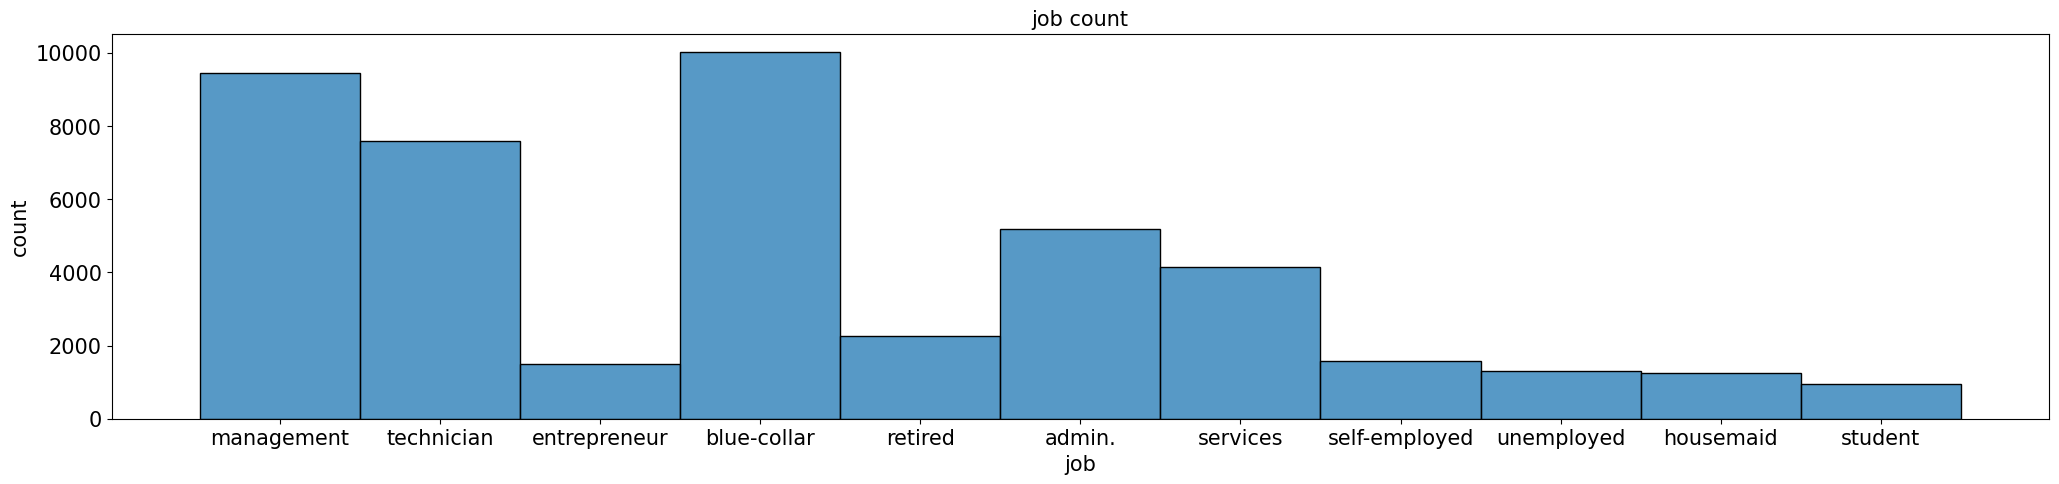

In [46]:
fig, (ax1) = plt.subplots(1,1,figsize = (25, 5))
sns.histplot(df['job'], ax = ax1, kde = False)
ax1.set_xlabel('job', fontsize=15)
ax1.set_ylabel('count', fontsize=15)
ax1.set_title('job count', fontsize=15)
ax1.tick_params(labelsize=15)

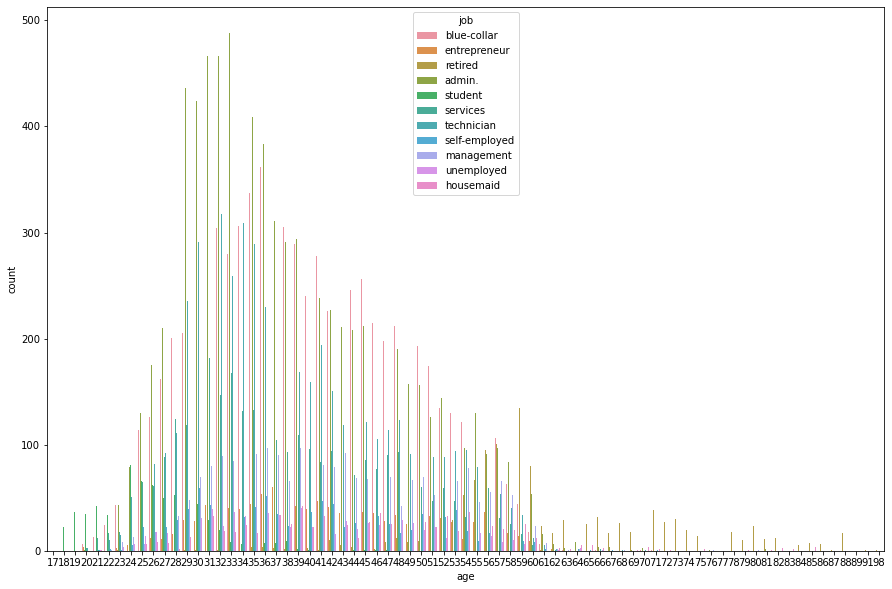

In [42]:
comparison_plot('age', 'job')

<AxesSubplot:xlabel='age', ylabel='job'>

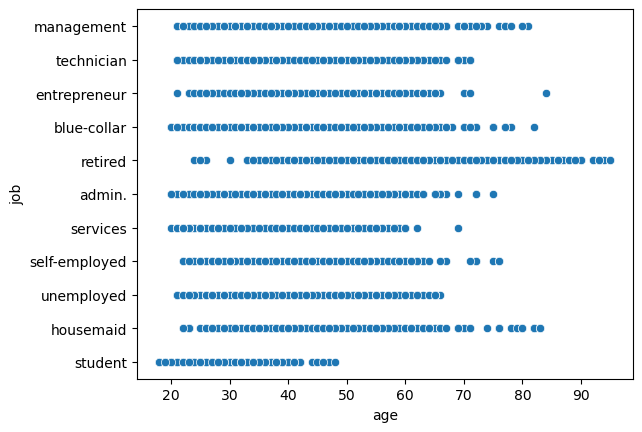

In [47]:
sns.scatterplot(df['age'], df['job'])

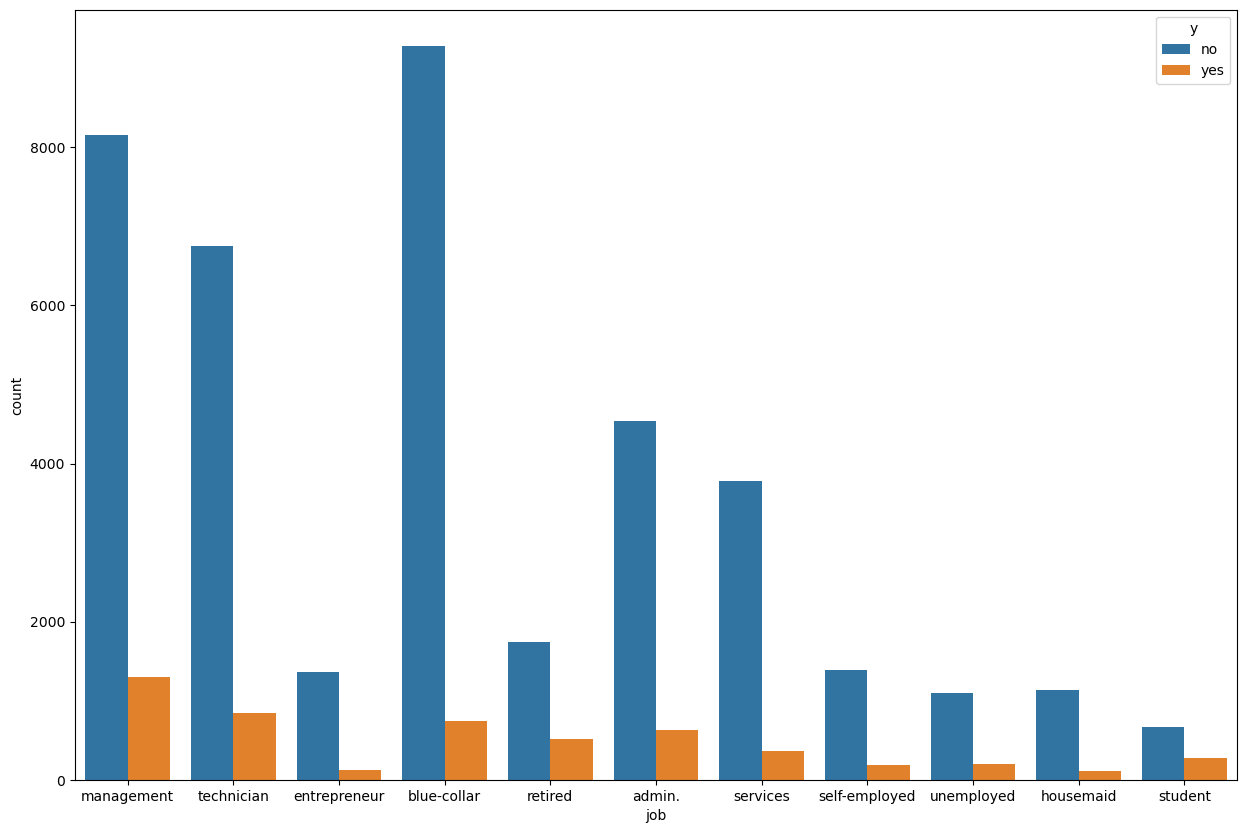

In [48]:
comparison_plot('job', 'y')

In [49]:
df1 = pd.DataFrame(df.groupby(['age', 'job'])['y'].value_counts())

In [50]:
df1

y
age job     y      
18  student yes   7
            no    5
19  student no   24
            yes  11
20  admin.  no    2
...              ..
92  retired yes   2
93  retired yes   2
94  retired no    1
95  retired no    1
            yes   1

[994 rows x 1 columns]

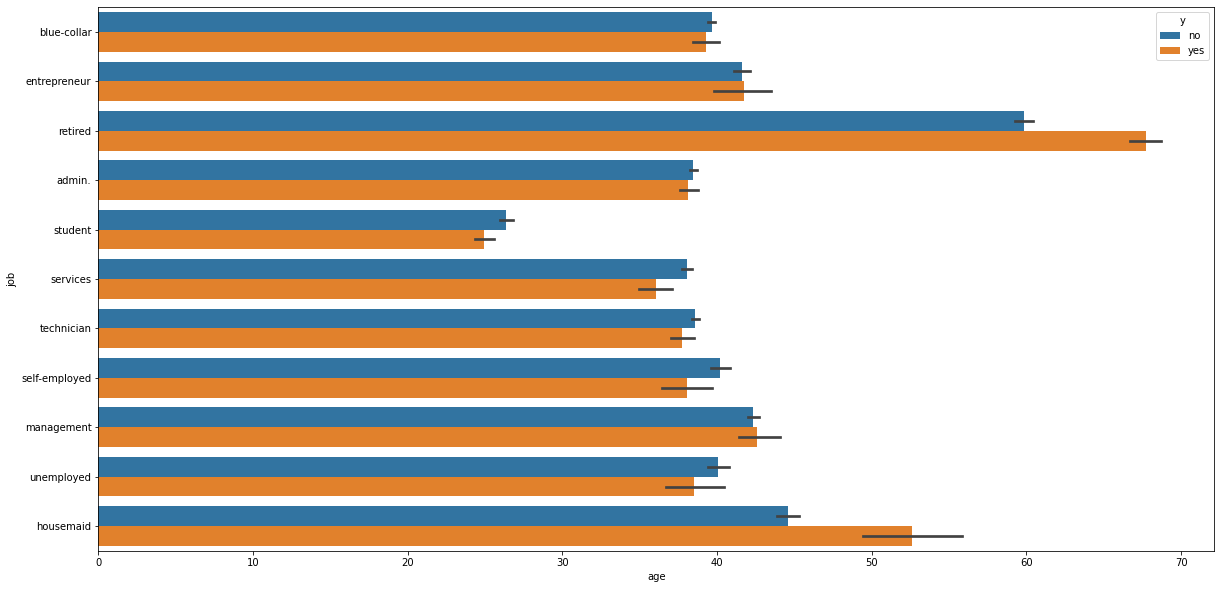

In [47]:
multi_comparison('age', 'job', 'y')

In [51]:
df1 = df.loc[:,['job','y']]
df1.value_counts(normalize = True)*100

job            y  
blue-collar    no     20.521554
management     no     18.042069
technician     no     14.945478
admin.         no     10.041804
services       no      8.371856
retired        no      3.866316
self-employed  no      3.078897
entrepreneur   no      3.016965
management     yes     2.877618
housemaid      no      2.501604
unemployed     no      2.435248
technician     yes     1.857955
blue-collar    yes     1.641194
student        no      1.479728
admin.         yes     1.395678
retired        yes     1.141315
services       yes     0.816173
student        yes     0.594988
unemployed     yes     0.446794
self-employed  yes     0.413616
entrepreneur   yes     0.272058
housemaid      yes     0.241092
dtype: float64

In [52]:
yes = df[df['y']== 'yes'].job.value_counts(normalize= True)*100
no = df[df['y']== 'no'].job.value_counts(normalize= True)*100

print('the persons based on job  do deposits:' '\n', yes)

print('\n')

print('the persons based on  job not do deposits:','\n', no)

the persons based on job  do deposits:
 management       24.598223
technician       15.882019
blue-collar      14.029117
admin.           11.930422
retired           9.756098
services          6.976744
student           5.086028
unemployed        3.819247
self-employed     3.535640
entrepreneur      2.325581
housemaid         2.060881
Name: job, dtype: float64


the persons based on  job not do deposits: 
 blue-collar      23.240319
management       20.432343
technician       16.925505
admin.           11.372176
services          9.480988
retired           4.378538
self-employed     3.486799
entrepreneur      3.416662
housemaid         2.833024
unemployed        2.757878
student           1.675768
Name: job, dtype: float64


In [53]:
print(no)

blue-collar      23.240319
management       20.432343
technician       16.925505
admin.           11.372176
services          9.480988
retired           4.378538
self-employed     3.486799
entrepreneur      3.416662
housemaid         2.833024
unemployed        2.757878
student           1.675768
Name: job, dtype: float64


when compare to job with not deposited blue-collar jobs.

In [54]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

# MARITAL

In [55]:
feature_analysis('marital')

unique_values: 
 ['married' 'single' 'divorced'] 
 value_counts: 
 married     27214
single      12790
divorced     5207
Name: marital, dtype: int64 
 proportion of value: 
 married     60.193316
single      28.289576
divorced    11.517109
Name: marital, dtype: float64 
 count of nan values: 0


the variable with more frequency is married


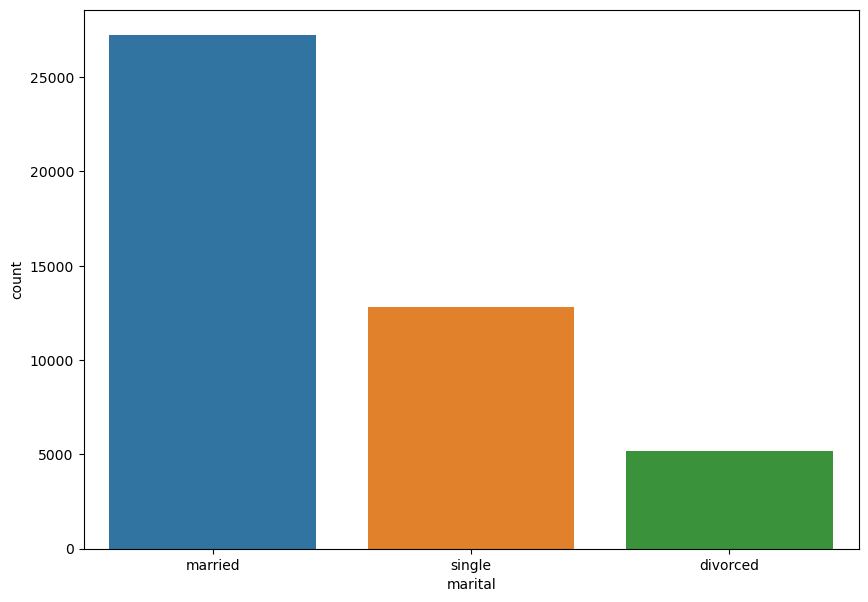

In [56]:
high_frequency('marital')

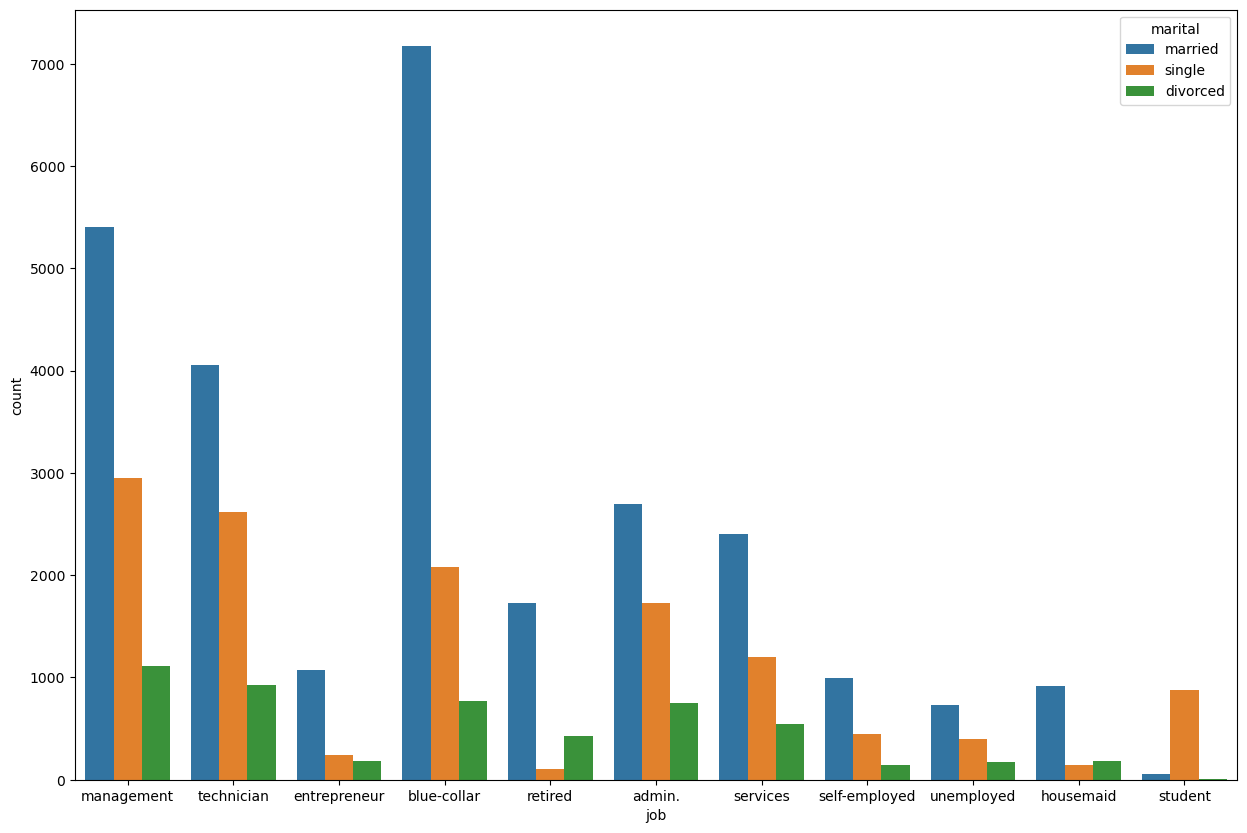

In [57]:
comparison_plot('job', 'marital')

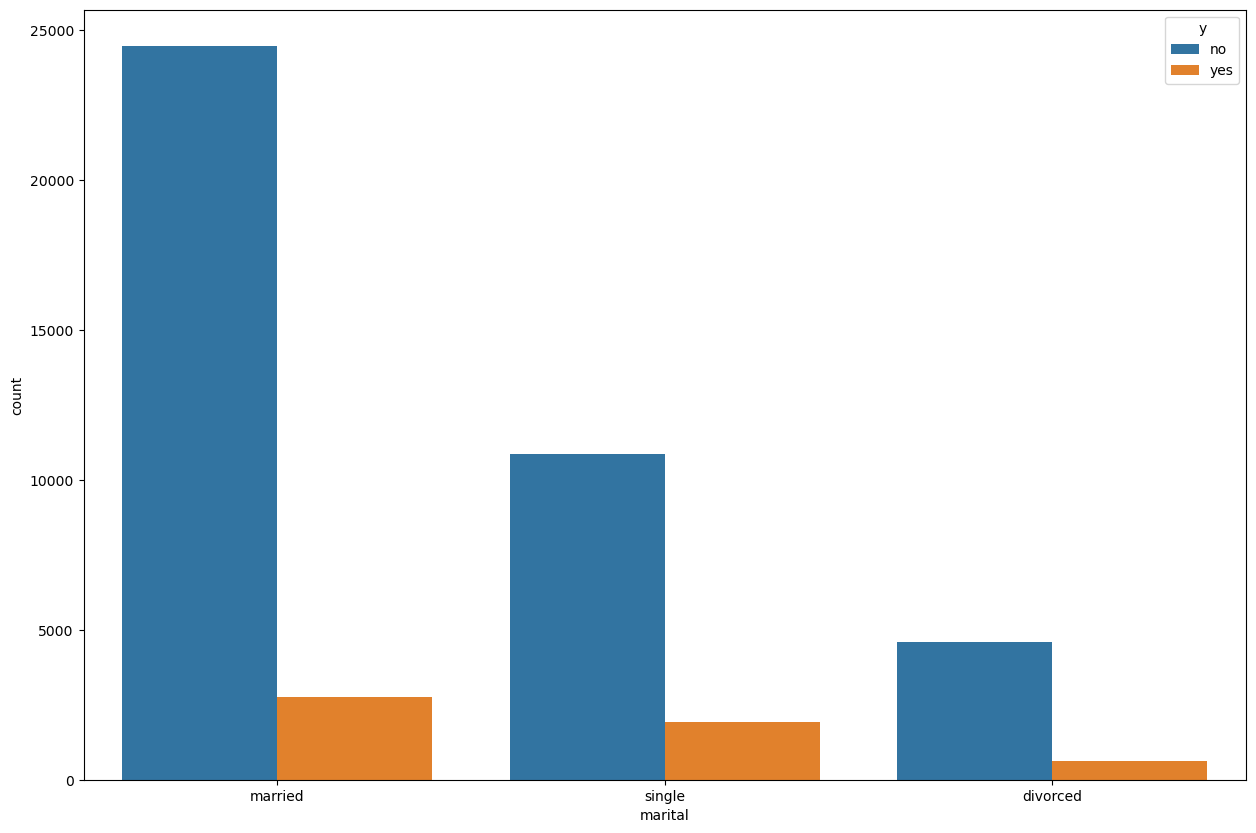

In [58]:
comparison_plot('marital','y')

In [59]:
yes = df[df['y']== 'yes'].marital.value_counts(normalize= True)*100
no = df[df['y']== 'no'].marital.value_counts(normalize= True)*100

print('the persons in marital status credit do deposits:' '\n', yes)

print('\n')

print('the persons in marital status not do deposits:','\n', no)

the persons in marital status credit do deposits:
 married     52.089242
single      36.150501
divorced    11.760257
Name: marital, dtype: float64


the persons in marital status not do deposits: 
 married     61.266971
single      27.248134
divorced    11.484896
Name: marital, dtype: float64


In [60]:
yes

married     52.089242
single      36.150501
divorced    11.760257
Name: marital, dtype: float64

In [61]:
no

married     61.266971
single      27.248134
divorced    11.484896
Name: marital, dtype: float64

# EDUCATION

In [62]:
feature_analysis('education')

unique_values: 
 ['tertiary' 'secondary' 'primary'] 
 value_counts: 
 secondary    25059
tertiary     13301
primary       6851
Name: education, dtype: int64 
 proportion of value: 
 secondary    55.426777
tertiary     29.419831
primary      15.153392
Name: education, dtype: float64 
 count of nan values: 0


the variable with more frequency is secondary


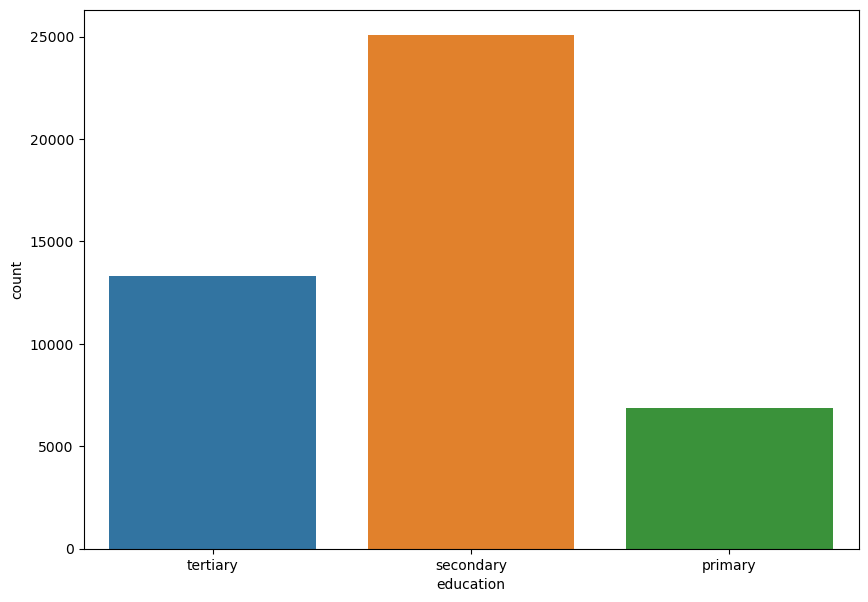

In [63]:
high_frequency('education')

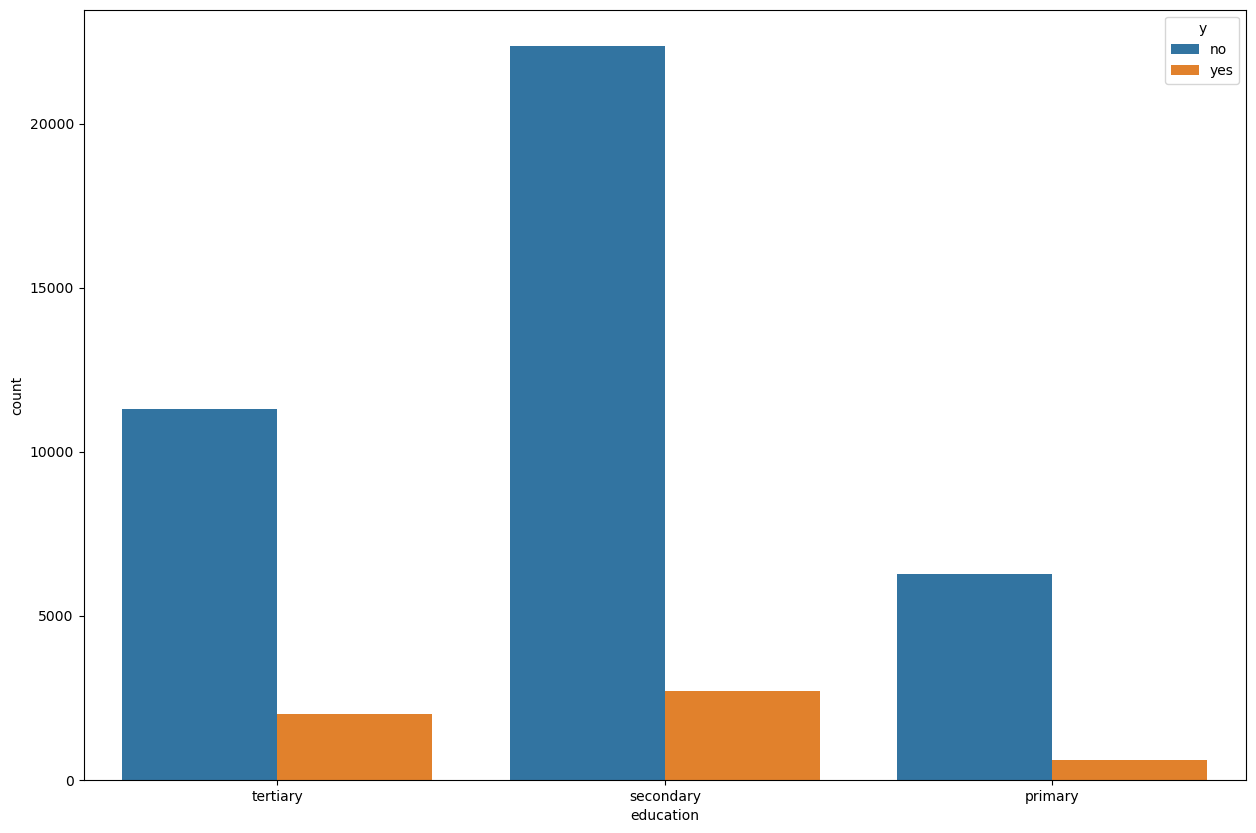

In [64]:
comparison_plot('education', 'y')

In [65]:
(df[df['education']== 'university.degree'])['y'].value_counts(normalize = True)*100

Series([], Name: y, dtype: float64)

# default

In [66]:
feature_analysis('default')

unique_values: 
 ['no' 'yes'] 
 value_counts: 
 no     44396
yes      815
Name: default, dtype: int64 
 proportion of value: 
 no     98.197341
yes     1.802659
Name: default, dtype: float64 
 count of nan values: 0


the variable with more frequency is no


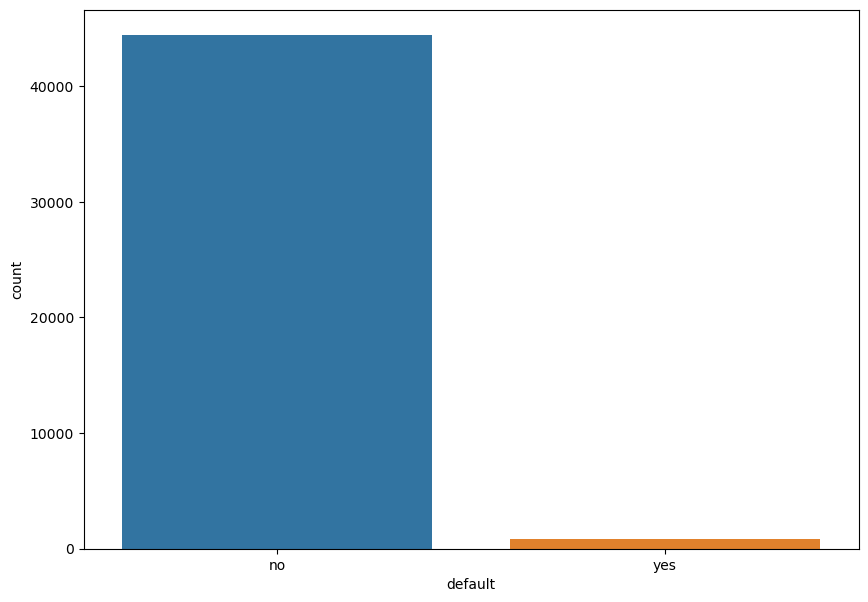

In [67]:
high_frequency('default')

In [68]:
df['default'] = df['default'].replace({'no': 'not having credit', 'yes': 'having credit'})

In [69]:
yes = df[df['y']== 'yes'].default.value_counts(normalize= True)*100
no = df[df['y']== 'no'].default.value_counts(normalize= True)*100

print('the persons in default credit do deposits:' '\n', yes)

print('\n')

print('the persons in default credit not do deposits:','\n', no)

the persons in default credit do deposits:
 not having credit    99.016827
having credit         0.983173
Name: default, dtype: float64


the persons in default credit not do deposits: 
 not having credit    98.088773
having credit         1.911227
Name: default, dtype: float64


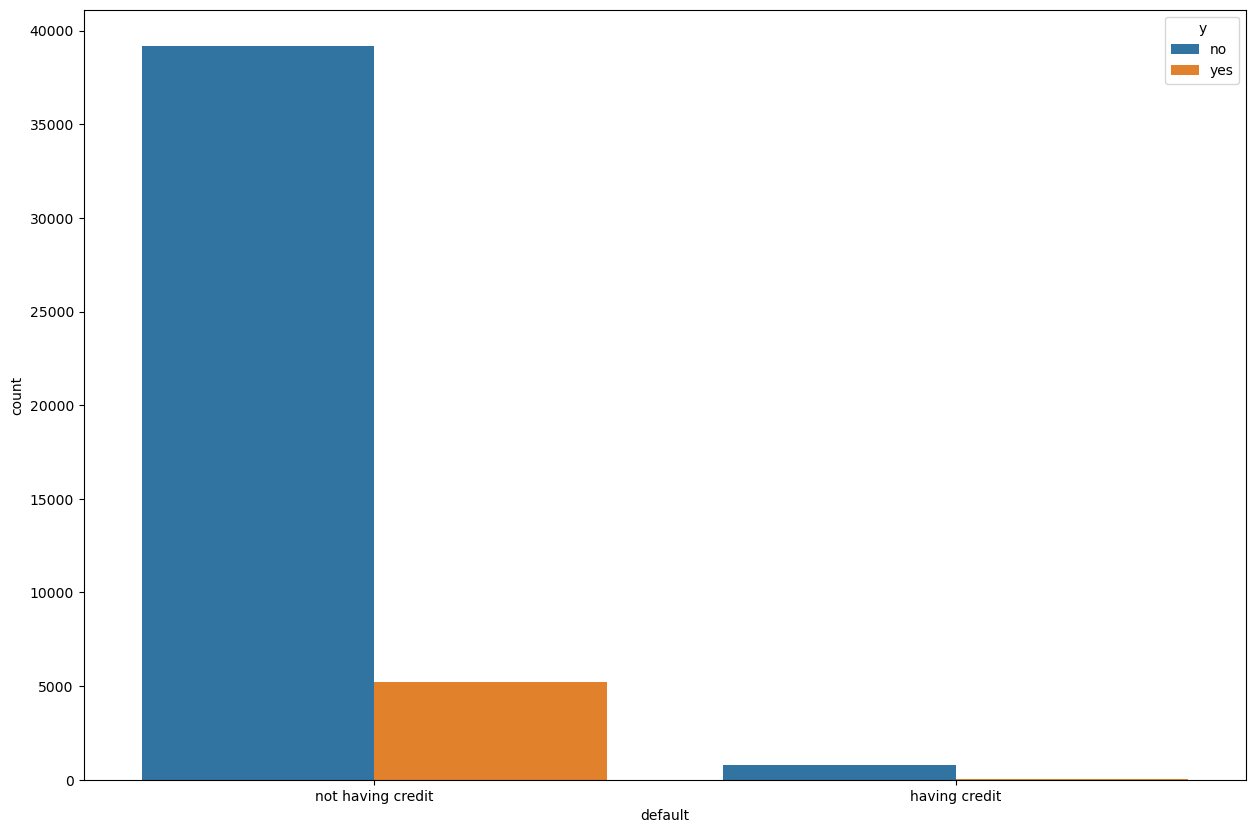

In [70]:
comparison_plot('default', 'y')

In [71]:
print('Default:\n No credit in default:' , df[df['default'] == 'no'] ['y'].count(),
              '\n Yes to credit in default:' , df[df['default'] == 'yes']    ['y'].count())



Default:
 No credit in default: 0 
 Yes to credit in default: 0


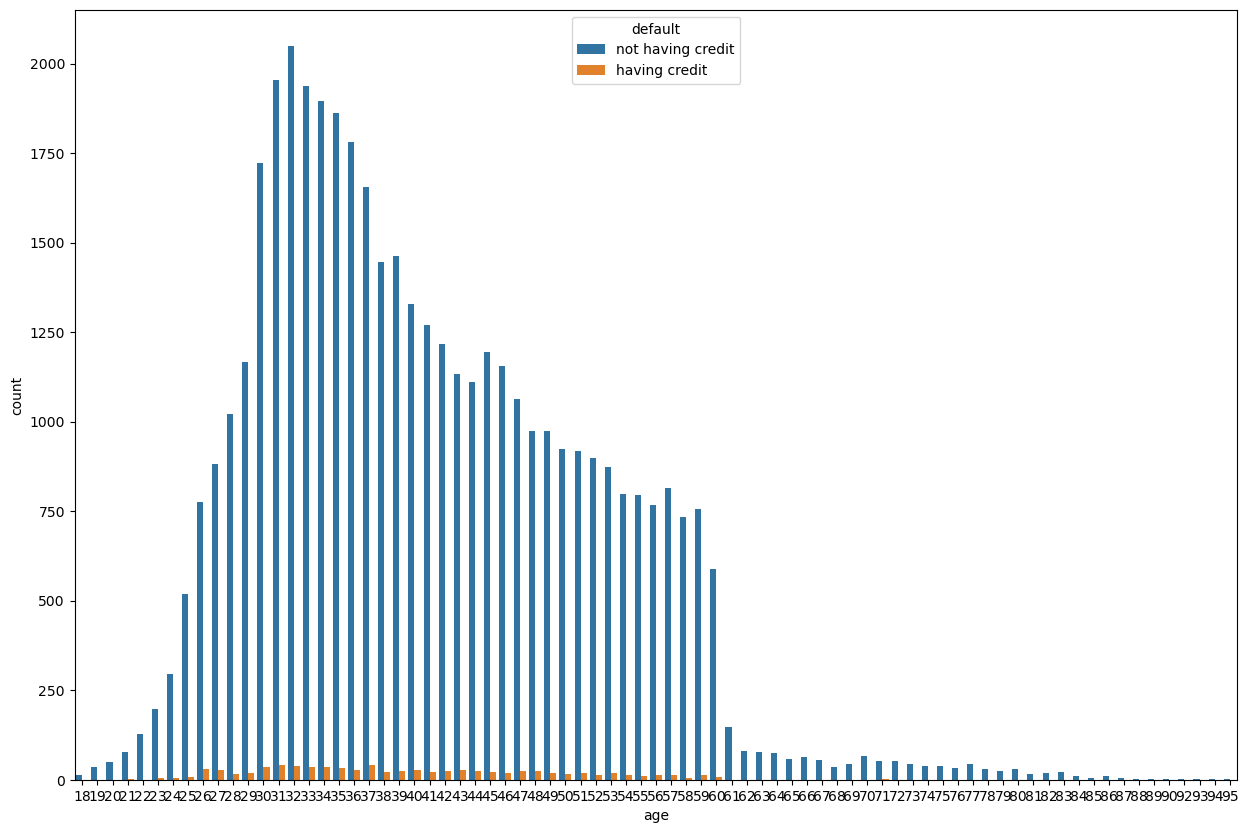

In [72]:
comparison_plot('age', 'default')

# HOUSING

In [73]:
feature_analysis('housing')

unique_values: 
 ['yes' 'no'] 
 value_counts: 
 yes    25130
no     20081
Name: housing, dtype: int64 
 proportion of value: 
 yes    55.583818
no     44.416182
Name: housing, dtype: float64 
 count of nan values: 0


the variable with more frequency is yes


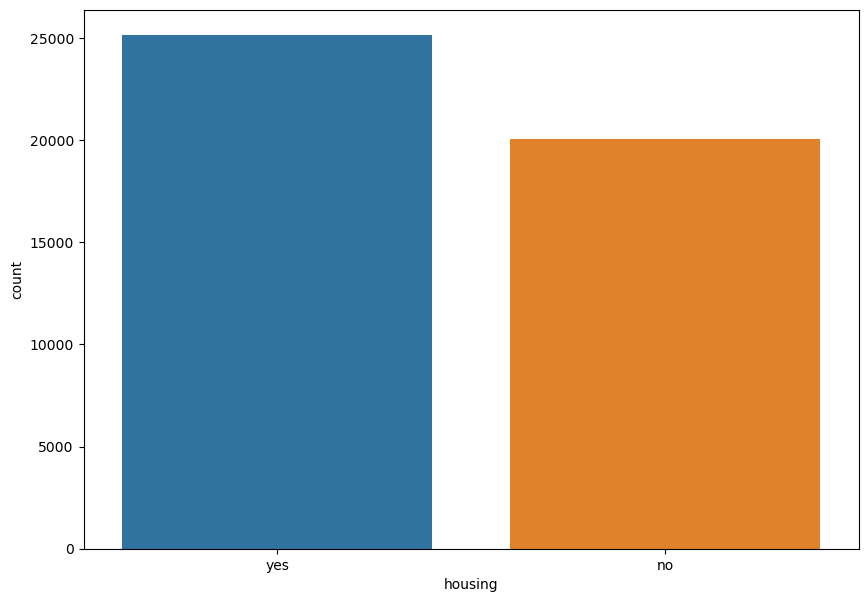

In [74]:
high_frequency('housing')

In [75]:
df['housing'] = df['housing'].replace({'no': 'not loan', 'yes': 'having loan'})

In [76]:
yes = df[df['y']== 'yes'].housing.value_counts(normalize= True)*100
no = df[df['y']== 'no'].housing.value_counts(normalize= True)*100

print('the persons in housing loan do deposits:' '\n', yes)

print('\n')

print('the persons in housing loan not do deposits:','\n', no)

the persons in housing loan do deposits:
 not loan       63.414634
having loan    36.585366
Name: housing, dtype: float64


the persons in housing loan not do deposits: 
 having loan    58.100797
not loan       41.899203
Name: housing, dtype: float64


# PERSONAL LOAN

In [77]:
feature_analysis('loan')

unique_values: 
 ['no' 'yes'] 
 value_counts: 
 no     37967
yes     7244
Name: loan, dtype: int64 
 proportion of value: 
 no     83.977351
yes    16.022649
Name: loan, dtype: float64 
 count of nan values: 0


the variable with more frequency is no


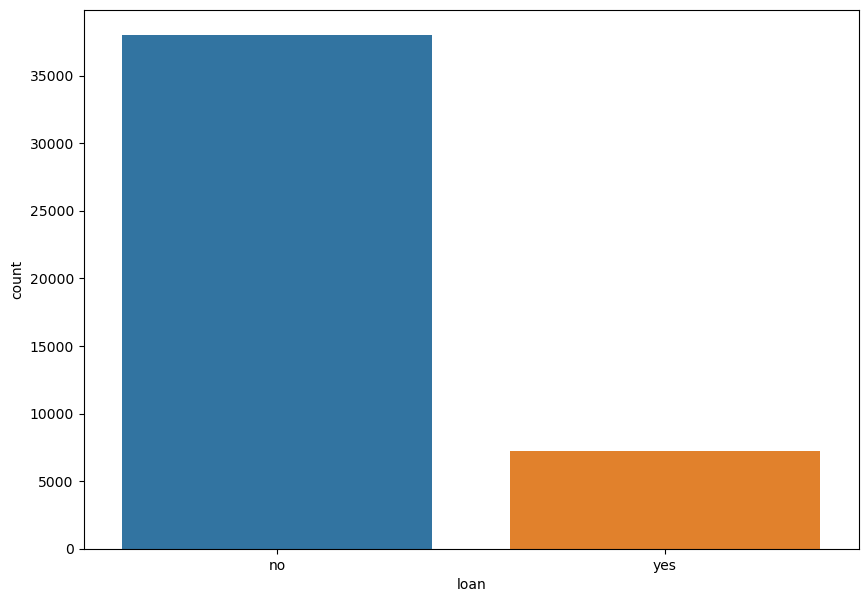

In [78]:
high_frequency('loan')

In [79]:
df['loan'] = df['loan'].replace({'no': 'not loan', 'yes': 'having loan'})

In [80]:
print('personal loan:\n Not having personal loan:'     , df[df['loan'] == 'not loan']['y'].count(),
              '\n Yes having personal loan:'    , df[df['loan'] == 'having loan']    ['y'].count())


personal loan:
 Not having personal loan: 37967 
 Yes having personal loan: 7244


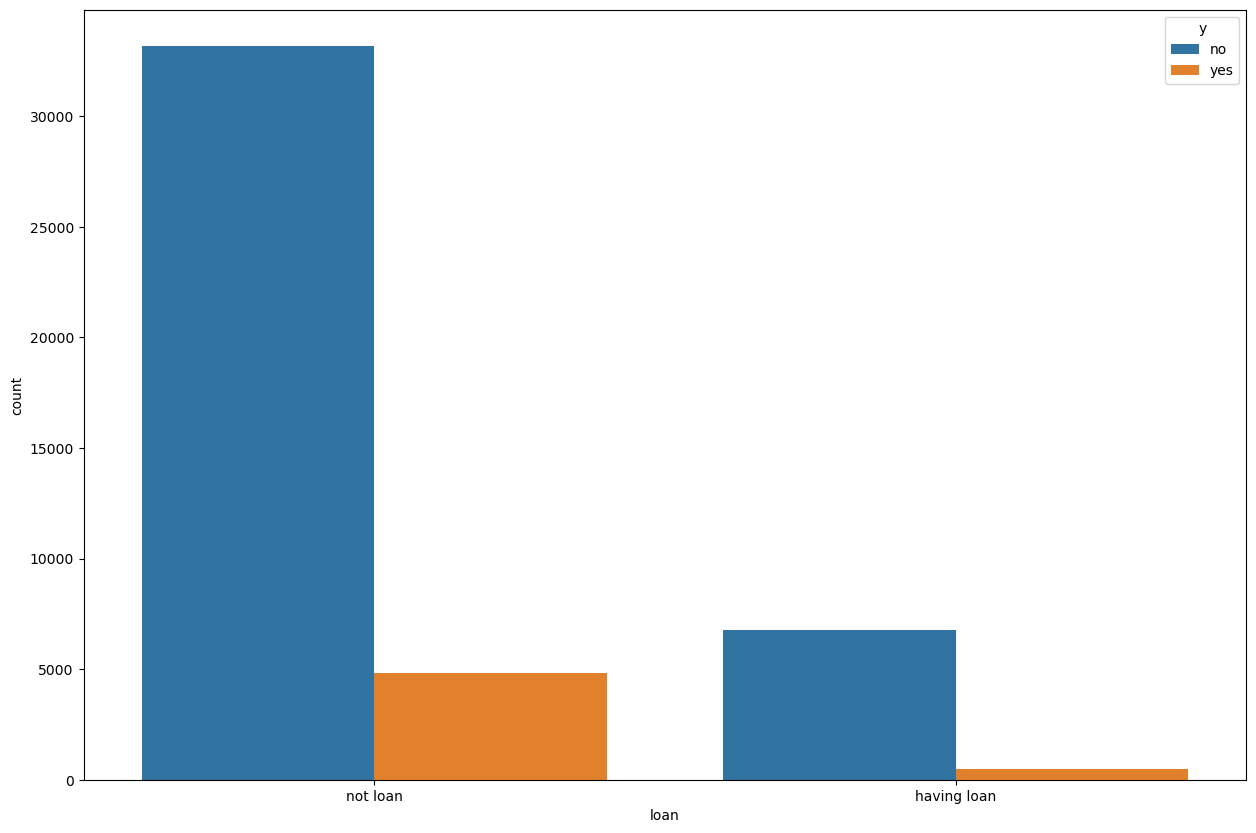

In [81]:
comparison_plot('loan', 'y')

In [82]:
yes = df[df['y']== 'yes'].loan.value_counts(normalize= True)*100
no = df[df['y']== 'no'].loan.value_counts(normalize= True)*100

print('the persons in personal loan do deposits:' '\n', yes)

print('\n')

print('the persons in personal loan not do deposits:','\n', no)

the persons in personal loan do deposits:
 not loan       90.848932
having loan     9.151068
Name: loan, dtype: float64


the persons in personal loan not do deposits: 
 not loan       83.066981
having loan    16.933019
Name: loan, dtype: float64


# details of the previous campaign

In [93]:
df['previous'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 45211 entries, 0 to 45210
Series name: previous
Non-Null Count  Dtype
--------------  -----
45211 non-null  int64
dtypes: int64(1)
memory usage: 353.3 KB


the variable with more frequency is 0


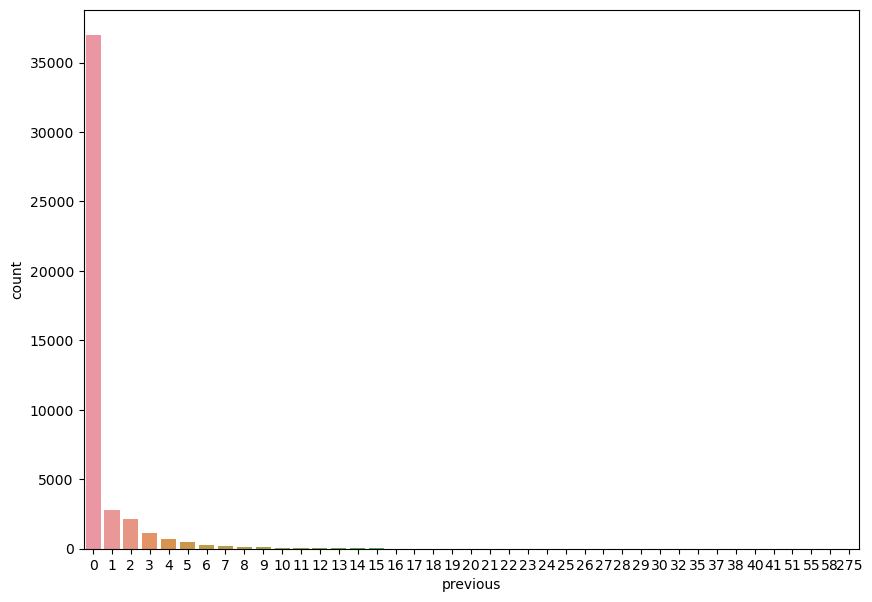

In [84]:
high_frequency('previous')

In [94]:
df['poutcome']

0        unknown
1        unknown
2        unknown
3        unknown
4        unknown
          ...   
45206    unknown
45207    unknown
45208    success
45209    unknown
45210      other
Name: poutcome, Length: 45211, dtype: object

In [95]:
mode= df['poutcome'].mode()

df['poutcome']= df['poutcome'].replace("nonexistent", 'failure')

In [96]:
feature_analysis('poutcome')

unique_values: 
 ['unknown' 'failure' 'other' 'success'] 
 value_counts: 
 unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64 
 proportion of value: 
 unknown    81.747805
failure    10.840282
other       4.069806
success     3.342107
Name: poutcome, dtype: float64 
 count of nan values: 0


# Observations:
1. Customers having admins, blue-collar, technicians jobs form the majority amongst those who have subscirbed to the term deposit.
2. When compared to the age with jobs retired persons are do more deposits than others.

3. They are married

4. They hold a university degree

5. They do not hold a credit in default

6. Housing loan doesn't seem a priority to check for since an equal number of customers who have and have not subscribed to it seem to have subscribed to the term deposit.

7. Cell-phones should be the preferred mode of contact for contacting customers

8. Reasons for the failure of previous campaign is not contacted client with much time maximum is 0 times

9. so the outcomes of the previous campaign is mostly failure.


# CURRENT CAMPAIGN DETAILS

# CONTACT

In [97]:
feature_analysis('contact')

unique_values: 
 ['cellular' 'telephone'] 
 value_counts: 
 cellular     42305
telephone     2906
Name: contact, dtype: int64 
 proportion of value: 
 cellular     93.572361
telephone     6.427639
Name: contact, dtype: float64 
 count of nan values: 0


the variable with more frequency is cellular


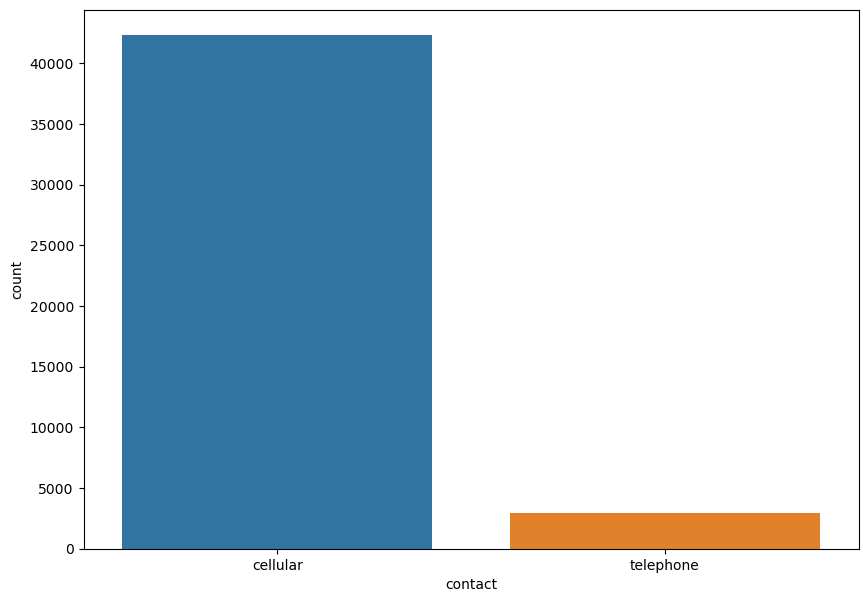

In [98]:
high_frequency('contact')

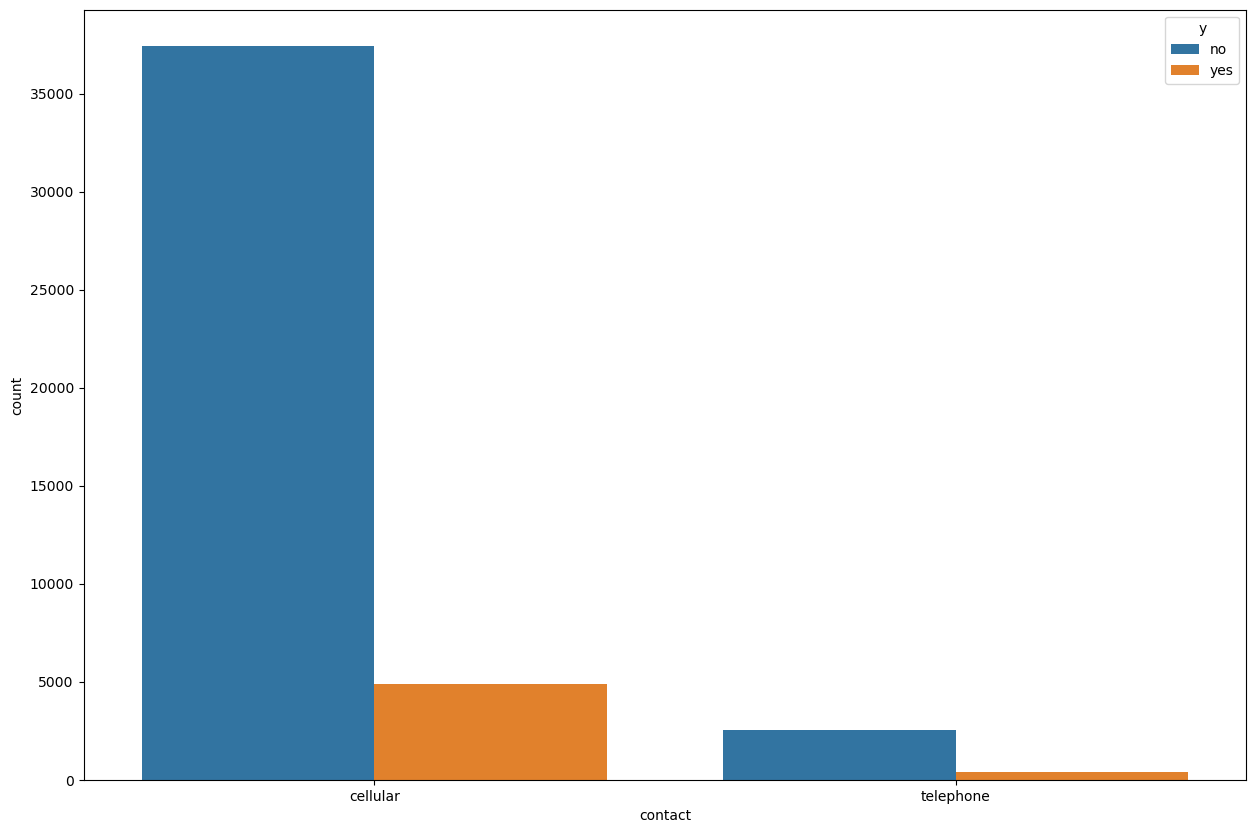

In [99]:
comparison_plot('contact', 'y')

In [100]:
yes = df[df['y']== 'yes'].contact.value_counts(normalize= True)*100
no = df[df['y']== 'no'].contact.value_counts(normalize= True)*100

print('contact persons  do deposits:' '\n', yes)

print('\n')

print('contact persons not do deposits:','\n', no)

contact persons  do deposits:
 cellular     92.626205
telephone     7.373795
Name: contact, dtype: float64


contact persons not do deposits: 
 cellular     93.697711
telephone     6.302289
Name: contact, dtype: float64


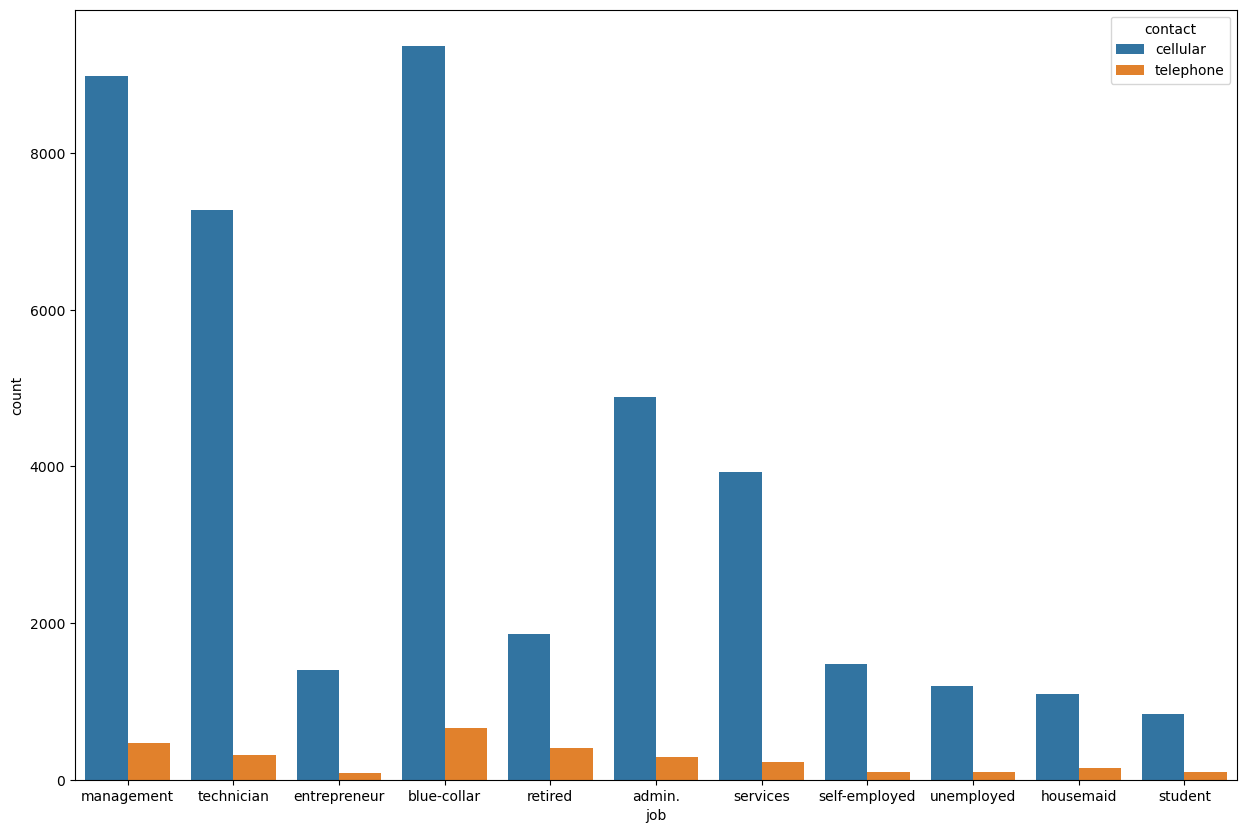

In [101]:
comparison_plot('job', 'contact')

# MONTH

In [102]:
df['month']

0        may
1        may
2        may
3        may
4        may
        ... 
45206    nov
45207    nov
45208    nov
45209    nov
45210    nov
Name: month, Length: 45211, dtype: object

In [103]:
feature_analysis('month')

unique_values: 
 ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep'] 
 value_counts: 
 may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64 
 proportion of value: 
 may    30.448342
jul    15.250713
aug    13.817434
jun    11.813497
nov     8.781049
apr     6.485147
feb     5.859194
jan     3.103227
oct     1.632346
sep     1.280662
mar     1.055053
dec     0.473336
Name: month, dtype: float64 
 count of nan values: 0


the variable with more frequency is may


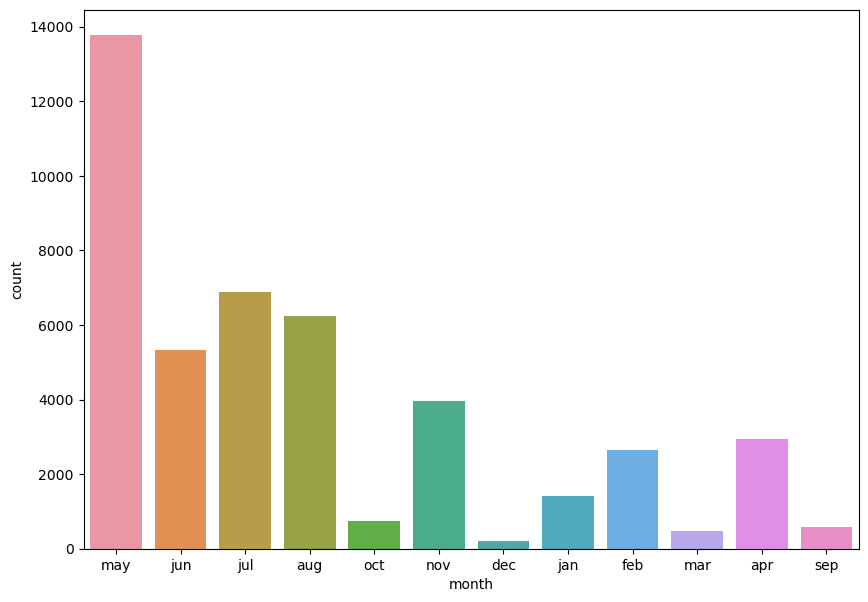

In [104]:
high_frequency('month')

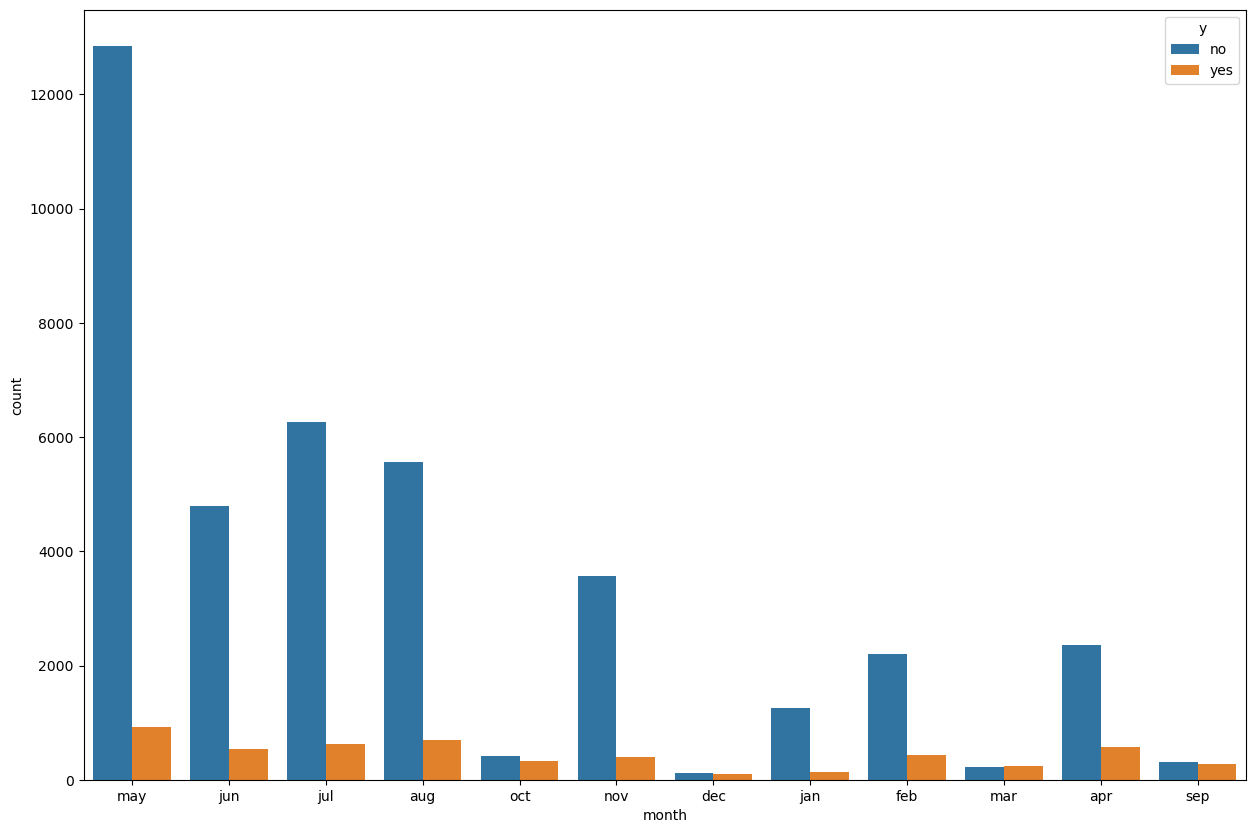

In [105]:
comparison_plot('month', 'y')

In [106]:
yes = df[df['y']== 'yes'].month.value_counts(normalize= True)*100
no = df[df['y']== 'no'].month.value_counts(normalize= True)*100

print(' in the month persons  do deposits:' '\n', yes)

print('\n')

print('in the months persons not do deposits:','\n', no)

 in the month persons  do deposits:
 may    17.489128
aug    13.008130
jul    11.854793
apr    10.909435
jun    10.323313
feb     8.338060
nov     7.619588
oct     6.107015
sep     5.086028
mar     4.688977
jan     2.684818
dec     1.890717
Name: month, dtype: float64


in the months persons not do deposits: 
 may    32.165222
jul    15.700616
aug    13.924653
jun    12.010921
nov     8.934923
apr     5.899003
feb     5.530785
jan     3.158659
oct     1.039527
sep     0.776514
mar     0.573619
dec     0.285557
Name: month, dtype: float64


In [109]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

# DAYS

In [117]:
df['day']

0         5
1         5
2         5
3         5
4         5
         ..
45206    17
45207    17
45208    17
45209    17
45210    17
Name: day, Length: 45211, dtype: int64

In [111]:
df['day'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 45211 entries, 0 to 45210
Series name: day
Non-Null Count  Dtype
--------------  -----
45211 non-null  int64
dtypes: int64(1)
memory usage: 353.3 KB


the variable with more frequency is 20


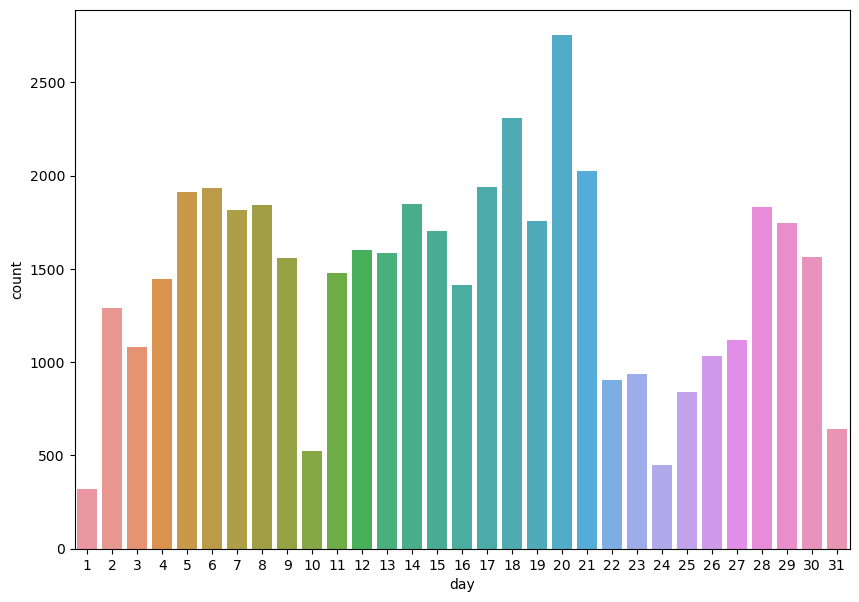

In [112]:
high_frequency('day')

# DURATION

In [118]:
feature_analysis('duration')

unique_values: 
 [ 261  151   76 ... 1298 1246 1556] 
 value_counts: 
 124     188
90      184
89      177
104     175
122     175
       ... 
1833      1
1545      1
1352      1
1342      1
1556      1
Name: duration, Length: 1573, dtype: int64 
 proportion of value: 
 124     0.415828
90      0.406981
89      0.391498
104     0.387074
122     0.387074
          ...   
1833    0.002212
1545    0.002212
1352    0.002212
1342    0.002212
1556    0.002212
Name: duration, Length: 1573, dtype: float64 
 count of nan values: 0


the variable with more frequency is 124


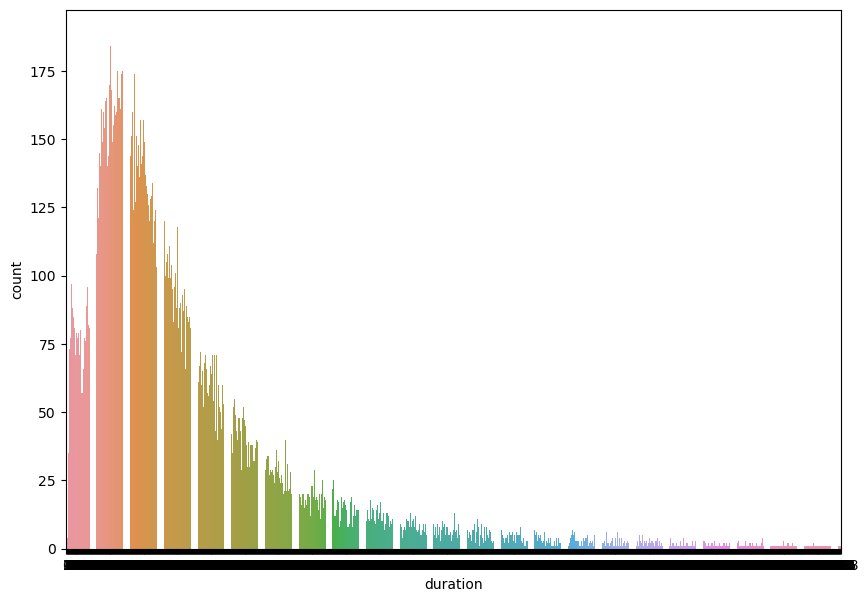

In [119]:
high_frequency('duration')

In [120]:
print("Max duration  call in minutes:  ", round((df['duration'].max()/60),1))
print("Min duration  call in minutes:   ", round((df['duration'].min()/60),1))
print("Mean duration call in minutes:   ", round((df['duration'].mean()/60),1))
print("STD duration  call in minutes:   ", round((df['duration'].std()/60),1))
print("Median duration call in minutes:   ", round((df['duration'].median()/60),1))


Max duration  call in minutes:   82.0
Min duration  call in minutes:    0.0
Mean duration call in minutes:    4.3
STD duration  call in minutes:    4.3
Median duration call in minutes:    3.0


The statistic value is 0.7269952297210693 with p-value : 0.0
duration is not normally distributed
Outlier : [1666, 1492, 787, 1778, 812, 1042, 1467, 1389, 849, 677, 2033, 673, 1056, 717, 683, 1077, 1419, 730, 746, 702, 714, 962, 742, 669, 680, 808, 652, 1201, 1030, 769, 673, 744, 765, 1623, 678, 699, 1677, 918, 1297, 1906, 703, 802, 684, 739, 1597, 1529, 720, 852, 923, 953, 732, 1521, 800, 1138, 786, 799, 866, 1581, 650, 1101, 912, 690, 1062, 688, 2177, 764, 1273, 1574, 984, 1689, 697, 944, 1102, 943, 813, 1040, 1084, 923, 693, 690, 1119, 1120, 784, 665, 712, 1007, 667, 982, 756, 807, 2087, 650, 1120, 956, 985, 672, 1187, 826, 732, 847, 659, 772, 929, 710, 705, 2462, 825, 646, 653, 1028, 654, 1087, 1692, 2016, 1054, 1170, 665, 1713, 663, 1080, 1461, 750, 1178, 752, 878, 834, 1534, 836, 1002, 757, 1147, 820, 788, 832, 1495, 646, 744, 891, 1083, 1266, 793, 1727, 1875, 907, 723, 704, 1346, 1386, 3366, 1000, 2231, 705, 665, 1167, 806, 766, 1015, 683, 730, 768, 1001, 845, 853, 813, 916, 753

None


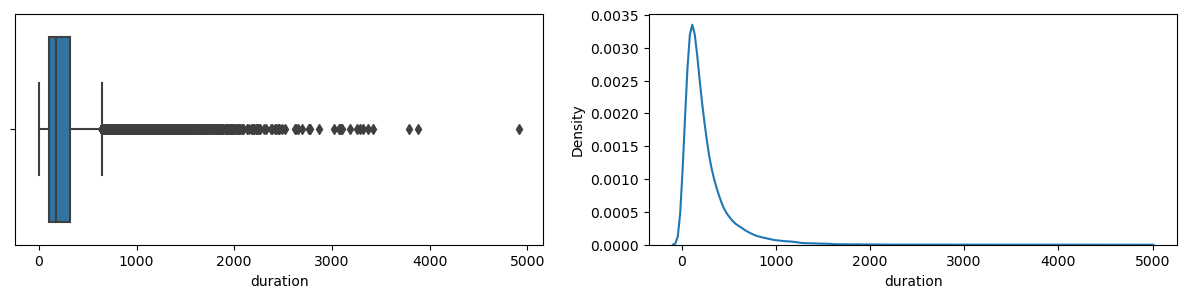

In [121]:
print(feature_box_kde_normality('duration'))

In [122]:
# outliers in calls duration
outlier_dur = [1148, 954, 1166, 800, 774, 878, 1326, 1487, 1855, 763, 754, 696, 825, 1238, 1130, 715, 663, 1288, 649, 1061, 1187, 808, 878, 645, 867, 843, 700, 789, 739, 666, 1101, 1241, 833, 741, 874, 1871, 668, 838, 1002, 680, 2420, 1021, 789, 744, 857, 748, 706, 837, 918, 695, 794, 690, 1307, 921, 1092, 722, 719, 1058, 823, 741, 811, 1597, 778, 744, 825, 1345, 3366, 647, 807, 675, 1217, 697, 1681, 958, 1452, 693, 1108, 1263, 788, 699, 1122, 913, 1076, 763, 800, 881, 1117, 1321, 863, 1855, 661, 657, 1124, 681, 785, 1051, 925, 2129, 1390, 828, 653, 1013, 750, 1106, 878, 784, 704, 743, 1598, 687, 770, 667, 926, 1805, 849, 940, 1364, 1207, 714, 1628, 817, 714, 1579, 1223, 691, 947, 992, 923, 657, 674, 703, 721, 660, 666, 1012, 1994, 719, 707, 794, 787, 1071, 688, 832, 647, 686, 779, 673, 1491, 686, 709, 881, 863, 740, 1254, 938, 732, 980, 1015, 849, 926, 1059, 1132, 1057, 662, 1512, 704, 1008, 725, 796, 1046, 1340, 667, 1180, 836, 722, 688, 1288, 855, 1255, 1171, 1473, 933, 911, 680, 720, 1489, 1022, 728, 678, 844, 1162, 764, 1580, 1017, 856, 1183, 666, 714, 1076, 1540, 721, 949, 761, 861, 709, 1503, 742, 727, 808, 1111, 827, 1369, 1101, 653, 1871, 1075, 1288, 952, 1027, 1139, 643, 806, 663, 671, 734, 921, 1222, 847, 686, 681, 669, 734, 975, 715, 1212, 956, 668, 1868, 797, 798, 722, 723, 1106, 1091, 955, 788, 660, 880, 1165, 700, 700, 800, 692, 930, 741, 1032, 649, 825, 1363, 966, 1243, 850, 865, 666, 799, 792, 682, 795, 834, 822, 663, 863, 665, 1154, 982, 712, 663, 758, 2025, 956, 1206, 922, 879, 844, 776, 1040, 1505, 806, 643, 1449, 874, 733, 643, 1310, 660, 988, 891, 769, 780, 1467, 766, 889, 1336, 957, 822, 650, 802, 771, 728, 1571, 713, 1869, 799, 787, 908, 670, 1129, 676, 685, 1368, 926, 4918, 757, 2055, 1411, 679, 1000, 685, 733, 646, 680, 757, 670, 1096, 1019, 811, 1195, 655, 1478, 679, 702, 733, 650, 645, 1958, 652, 1508, 1120, 1323, 764, 695, 747, 896, 884, 742, 961, 815, 984, 850, 664, 796, 1834, 649, 939, 744, 934, 751, 3509, 1134, 792, 667, 764, 729, 728, 1143, 792, 815, 676, 685, 1152, 1217, 722, 1275, 992, 1180, 796, 783, 1032, 1266, 771, 665, 1064, 660, 1046, 1112, 1966, 950, 1144, 660, 837, 1139, 702, 1410, 1606, 1072, 643, 661, 1232, 765, 1341, 2299, 1187, 831, 740, 1007, 790, 787, 675, 738, 1369, 668, 899, 1398, 1328, 973, 2231, 704, 650, 668, 1074, 1044, 723, 651, 705, 1534, 750, 908, 683, 784, 725, 651, 744, 835, 852, 1218, 723, 645, 802, 935, 748, 742, 898, 781, 877, 662, 3078, 1250, 903, 1254, 1014, 808, 1000, 1271, 656, 1087, 716, 829, 820, 769, 733, 824, 764, 738, 700, 820, 844, 1014, 814, 963, 701, 1178, 1152, 676, 935, 825, 685, 1070, 1106, 679, 683, 952, 846, 1504, 669, 714, 742, 1042, 800, 858, 779, 829, 878, 890, 986, 880, 2316, 1222, 715, 788, 884, 1080, 763, 697, 1085, 789, 800, 1499, 1075, 1422, 863, 676, 1344, 981, 1405, 854, 785, 937, 985, 935, 1066, 693, 851, 769, 673, 740, 1348, 648, 929, 956, 1139, 738, 967, 815, 1145, 657, 3076, 820, 686, 1569, 953, 1363, 863, 676, 947, 1479, 770, 1063, 731, 716, 755, 963, 788, 1374, 760, 737, 1286, 1001, 729, 1730, 786, 1543, 1307, 744, 777, 698, 713, 1005, 891, 1200, 795, 690, 1745, 1441, 737, 650, 1208, 2219, 781, 1205, 795, 1707, 810, 860, 1056, 676, 668, 869, 854, 654, 729, 818, 1065, 799, 681, 821, 756, 656, 731, 1018, 771, 691, 946, 1573, 1166, 1173, 836, 1062, 1231, 1439, 658, 712, 1244, 733, 1120, 1074, 1332, 1135, 760, 854, 816, 804, 1332, 974, 985, 1555, 651, 1063, 755, 695, 819, 740, 1000, 658, 1426, 746, 1210, 819, 1063, 806, 1142, 686, 836, 997, 1227, 662, 1208, 1435, 785, 703, 749, 761, 674, 753, 744, 813, 850, 881, 699, 1002, 712, 1199, 990, 650, 736, 695, 835, 777, 676, 856, 678, 1272, 957, 1204, 1820, 759, 703, 835, 1359, 860, 656, 746, 643, 820, 3183, 657, 981, 746, 1137, 743, 1039, 945, 698, 718, 1584, 1272, 751, 848, 924, 1175, 1063, 843, 1182, 731, 790, 777, 1330, 732, 1416, 678, 670, 925, 1330, 1532, 1017, 689, 699, 1185, 762, 838, 1226, 1065, 654, 882, 717, 986, 1089, 956, 957, 1181, 675, 798, 1105, 968, 791, 674, 1032, 723, 2078, 1051, 841, 781, 829, 1053, 1867, 830, 1187, 898, 689, 1127, 878, 949, 928, 1649, 1036, 671, 668, 894, 717, 695, 645, 849, 722, 1114, 963, 927, 748, 672, 2680, 790, 684, 1548, 862, 993, 1318, 1068, 771, 828, 725, 1120, 718, 678, 692, 924, 720, 1138, 2191, 1156, 786, 924, 692, 1060, 875, 832, 1161, 835, 692, 1615, 1036, 647, 716, 758, 913, 996, 1084, 777, 761, 918, 917, 904, 1114, 793, 674, 1100, 797, 728, 664, 655, 2184, 885, 662, 800, 1642, 1008, 686, 1248, 795, 709, 704, 667, 1130, 1110, 793, 816, 827, 768, 984, 767, 699, 996, 680, 802, 661, 847, 895, 824, 1848, 1012, 652, 651, 1022, 707, 722, 733, 1011, 1077, 1059, 692, 2203, 1020, 733, 827, 871, 1448, 1285, 1422, 2653, 1015, 1476, 792, 667, 991, 968, 766, 979, 900, 873, 709, 888, 720, 668, 669, 850, 1030, 767, 730, 699, 983, 763, 723, 665, 1272, 1065, 705, 907, 825, 1186, 675, 1017, 705, 838, 779, 844, 704, 654, 918, 1083, 781, 685, 816, 663, 839, 885, 919, 1119, 871, 924, 830, 2029, 1032, 1469, 659, 731, 1062, 669, 1313, 1767, 812, 693, 1495, 905, 684, 773, 1240, 1298, 665, 720, 1689, 780, 742, 1241, 692, 712, 686, 1156, 793, 655, 816, 1156, 706, 687, 729, 805, 813, 829, 703, 1001, 665, 944, 768, 2516, 748, 702, 674, 1045, 2429, 788, 1093, 819, 1051, 851, 749, 680, 768, 953, 870, 793, 1003, 1804, 753, 774, 705, 966, 643, 808, 807, 938, 727, 681, 875, 644, 1002, 899, 944, 989, 978, 890, 908, 1202, 804, 1446, 860, 945, 1806, 711, 1143, 767, 657, 854, 711, 837, 1237, 856, 892, 996, 989, 1096, 729, 681, 768, 1298, 1311, 712, 1422, 822, 1091, 1197, 1093, 788, 716, 747, 671, 780, 3253, 662, 1062, 1030, 1339, 1185, 903, 731, 933, 1135, 694, 687, 1014, 701, 685, 1023, 1642, 684, 749, 1167, 825, 1131, 772, 867, 763, 659, 920, 654, 797, 696, 824, 1347, 886, 1617, 873, 1110, 1203, 1095, 679, 745, 852, 720, 708, 1141, 697, 679, 964, 900, 734, 916, 668, 688, 876, 1130, 1321, 1010, 754, 906, 700, 709, 1056, 1461, 884, 3284, 992, 956, 755, 800, 753, 903, 917, 1130, 834, 893, 1373, 1809, 1438, 792, 876, 1181, 808, 2093, 770, 857, 673, 927, 889, 697, 1034, 732, 903, 1567, 644, 1224, 734, 1071, 909, 646, 702, 885, 735, 838, 1408, 1954, 1064, 1118, 1448, 730, 2621, 1970, 1041, 653, 843, 835, 819, 873, 1067, 1357, 687, 903, 1092, 1210, 881, 967, 700, 1175, 792, 1309, 740, 763, 837, 910, 1472, 882, 700, 700, 973, 971, 951, 784, 895, 1073, 643, 1297, 698, 1011, 1148, 758, 2035, 772, 714, 1488, 2062, 1388, 984, 1017, 1025, 706, 715, 720, 872, 805, 773, 687, 659, 719, 1288, 675, 1258, 692, 920, 955, 871, 1132, 1044, 958, 2635, 898, 1101, 728, 722, 1721, 1394, 774, 864, 894, 1127, 744, 763, 773, 764, 2187, 1380, 851, 984, 958, 1353, 837, 1151, 1024, 951, 1162, 705, 654, 886, 1336, 922, 652, 828, 891, 700, 1613, 983, 713, 925, 1032, 659, 762, 2016, 952, 729, 911, 1007, 657, 1392, 788, 1437, 699, 1020, 700, 1052, 773, 726, 1049, 1490, 837, 738, 655, 796, 991, 686, 977, 659, 701, 867, 1011, 688, 936, 942, 766, 827, 1756, 1121, 1259, 806, 1992, 773, 796, 1049, 648, 687, 671, 818, 1225, 689, 1176, 698, 746, 762, 1166, 678, 780, 1206, 1386, 668, 836, 710, 744, 671, 774, 1143, 899, 862, 677, 753, 820, 696, 754, 798, 790, 693, 772, 714, 643, 754, 895, 882, 869, 675, 1081, 749, 686, 811, 858, 911, 1003, 1080, 765, 848, 953, 1038, 835, 1170, 833, 931, 735, 933, 1169, 653, 4199, 671, 1516, 665, 759, 696, 1528, 682, 682, 1136, 1149, 1005, 771, 643, 1334, 659, 706, 745, 1028, 1309, 717, 1193, 1545, 1268, 696, 1590, 739, 676, 798, 839, 935, 659, 919, 670, 1386, 788, 1094, 1128, 655, 1038, 821, 905, 720, 1297, 671, 911, 651, 744, 1162, 861, 862, 1010, 675, 1080, 853, 745, 815, 699, 819, 1055, 935, 1373, 738, 1166, 654, 808, 943, 990, 805, 1238, 684, 687, 984, 731, 1074, 729, 719, 870, 2089, 773, 889, 1252, 663, 698, 935, 804, 919, 825, 1223, 645, 1311, 1059, 1184, 1346, 1081, 691, 716, 768, 744, 936, 1112, 870, 921, 710, 859, 1552, 667, 1290, 725, 1833, 644, 854, 705, 992, 916, 682, 1697, 776, 723, 747, 1060, 712, 1529, 860, 691, 1118, 2462, 1530, 902, 863, 854, 1138, 893, 840, 1336, 1476, 702, 651, 875, 1365, 1353, 664, 1319, 1165, 965, 1205, 710, 728, 2456, 1276, 1085, 820, 1076, 832, 799, 952, 782, 961, 1082, 747, 757, 657, 713, 890, 1529, 1173, 993, 670, 830, 652, 1333, 746, 802, 1307, 1042, 1282, 797, 698, 1150, 658, 1078, 644, 3643, 898, 1026, 1399, 1087, 796, 722, 1027, 756, 964, 704, 786, 1735, 993, 723, 1468, 818, 732, 1241, 894, 911, 1102, 924, 742, 1148, 1550, 667, 744, 878, 652, 857, 1098, 700, 998, 860, 1009, 1307, 899, 695, 893, 659, 955, 836, 832, 1226, 905, 809, 790, 787, 2453, 843, 1462, 855, 826, 803, 729, 940, 1925, 676, 740, 691, 952, 657, 890, 2870, 709, 982, 644, 1111, 1962, 2028, 933, 916, 1020, 1246, 1551, 889, 826, 1344, 1467, 677, 1957, 3422, 1176, 837, 711, 834, 1906, 796, 1183, 662, 961, 1140, 857, 744, 936, 673, 683, 919, 776, 1109, 1057, 660, 813, 646, 988, 1503, 670, 910, 876, 1144, 964, 676, 1199, 711, 853, 646, 712, 1242, 707, 756, 1195, 703, 716, 647, 746, 676, 672, 862, 1174, 1007, 1618, 910, 1196, 861, 903, 766, 971, 747, 1031, 756, 673, 1012, 768, 1161, 1464, 658, 1077, 698, 804, 984, 1090, 1880, 765, 976, 767, 780, 1054, 1035, 743, 1055, 729, 1492, 982, 1344, 777, 688, 1452, 1245, 1334, 1276, 1106, 768, 877, 826, 936, 915, 898, 743, 1141, 1218, 1392, 809, 1356, 796, 946, 736, 644, 1025, 929, 772, 705, 983, 1022, 709, 1349, 716, 696, 2139, 1277, 1121, 968, 702, 973, 940, 968, 1099, 1153, 794, 920, 643, 680, 920, 897, 884, 701, 666, 1109, 783, 775, 721, 1624, 1221, 662, 942, 880, 883, 1090, 1084, 1018, 1306, 1241, 868, 1068, 1132, 754, 695, 1574, 775, 823, 1151, 645, 1037, 689, 755, 994, 707, 899, 990, 1471, 869, 788, 691, 824, 711, 834, 762, 731, 742, 679, 745, 1946, 667, 733, 709, 1300, 848, 662, 769, 882, 772, 761, 661, 1038, 905, 688, 730, 1037, 808, 649, 776, 801, 1150, 648, 1788, 758, 994, 689, 714, 1503, 754, 943, 771, 738, 901, 1502, 1029, 659, 773, 846, 1257, 801, 661, 698, 1206, 705, 1426, 713, 752, 1293, 901, 736, 1142, 884, 712, 1178, 3094, 645, 1563, 1165, 657, 680, 761, 674, 1281, 1106, 744, 952, 867, 652, 845, 700, 893, 664, 1064, 749, 775, 792, 1056, 764, 849, 1084, 1203, 847, 1543, 955, 678, 649, 678, 685, 994, 762, 766, 715, 732, 1329, 902, 1514, 1120, 1462, 748, 750, 799, 1168, 1360, 1125, 655, 708, 955, 729, 814, 686, 1298, 680, 716, 730, 1975, 767, 811, 656, 1425, 2016, 958, 1138, 788, 1276, 1228, 689, 703, 870, 1480, 1089, 649, 1271, 975, 1100, 1027, 1122, 1598, 997, 1337, 720, 744, 708, 651, 1777, 809, 2053, 923, 744, 665, 830, 750, 1460, 673, 651, 836, 864, 736, 700, 700, 668, 725, 652, 725, 656, 745, 781, 1721, 699, 894, 1532, 808, 722, 921, 2926, 837, 667, 1197, 805, 1231, 1041, 1061, 644, 808, 886, 922, 847, 834, 762, 1051, 850, 787, 789, 1576, 734, 753, 791, 742, 1002, 881, 742, 736, 694, 971, 786, 753, 849, 1376, 770, 654, 868, 1182, 904, 665, 915, 851, 643, 784, 952, 1089, 746, 959, 829, 877, 706, 1271, 1156, 876, 857, 670, 652, 1327, 3785, 1476, 924, 724, 1370, 1221, 1134, 690, 1352, 837, 802, 985, 739, 1720, 957, 728, 730, 661, 1516, 1034, 1036, 906, 1342, 1073, 725, 1233, 1066, 643, 697, 1025, 1045, 1472, 679, 674, 653, 1088, 732, 874, 854, 1013, 986, 695, 720, 747, 675, 1389, 782, 1576, 758, 850, 1000, 679, 1559, 669, 852, 1817, 733, 730, 718, 721, 665, 845, 691, 840, 767, 720, 714, 970, 834, 883, 895, 844, 669, 849, 940, 952, 716, 946, 1973, 697, 800, 1203, 895, 761, 754, 1119, 758, 672, 658, 670, 956, 1287, 763, 1302, 659, 664, 1097, 813, 882, 652, 788, 968, 1206, 826, 1192, 712, 1009, 760, 896, 832, 654, 1000, 892, 1028, 897, 1130, 663, 726, 679, 794, 815, 703, 833, 732, 654, 823, 1329, 843, 717, 728, 834, 827, 2015, 1200, 698, 771, 1034, 999, 738, 684, 1023, 884, 926, 1126, 1294, 977, 653, 1224, 705, 976, 736, 1877, 1164, 726, 710, 730, 653, 666, 924, 935, 730, 2462, 897, 1030, 851, 1147, 1201, 897, 934, 2301, 893, 1303, 902, 1934, 1243, 1395, 1283, 854, 1133, 858, 646, 693, 828, 804, 788, 706, 902, 867, 962, 961, 717, 992, 1083, 649, 767, 825, 1028, 733, 698, 1191, 703, 843, 1222, 1024, 786, 1259, 1556, 697, 855, 966, 686, 1260, 902, 660, 668, 804, 1242, 1521, 734, 1372, 775, 1850, 763, 814, 1336, 899, 987, 1603, 775, 969, 812, 838, 692, 654, 1740, 930, 673, 1129, 810, 1063, 845, 717, 663, 1042, 1092, 1008, 798, 803, 778, 865, 715, 750, 911, 672, 939, 1269, 1123, 690, 1070, 953, 812, 1408, 1089, 782, 974, 1806, 765, 690, 1176, 1184, 947, 749, 932, 802, 696, 912, 712, 1207, 1663, 744, 2372, 716, 1178, 954, 1044, 652, 753, 712, 968, 741, 1877, 1452, 1313, 764, 654, 1463, 757, 810, 675, 682, 649, 742, 800, 667, 1391, 718, 727, 827, 817, 864, 1689, 1121, 691, 1882, 695, 924, 709, 1171, 813, 707, 817, 805, 882, 796, 694, 781, 773, 803, 683, 747, 1045, 800, 1156, 780, 1666, 1141, 645, 724, 811, 661, 1434, 833]

(len(outlier_dur)/len(df))*100

5.259781911481719

In [123]:
df[(df['duration'] == 0)]


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
6424,53,management,married,primary,not having credit,351,having loan,not loan,cellular,27,may,0,4,-1,0,unknown,no
22937,35,technician,married,secondary,not having credit,5535,not loan,not loan,cellular,26,aug,0,15,-1,0,unknown,no
36425,31,entrepreneur,married,secondary,not having credit,162,having loan,having loan,cellular,11,may,0,2,-1,0,unknown,no


In [124]:
max_dur =df[(df['duration'] == 82)]


In [125]:
max_dur['y'].value_counts()

no     162
yes      3
Name: y, dtype: int64

In [128]:
df[df['y'] == 3]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [129]:
yes = df[df['y']== 'yes'].duration.value_counts()
no = df[df['y']== 'no'].duration.value_counts()

print(' in the calls duration do deposits:' '\n', yes)

print('\n')

print('in the calls duration not do deposits:','\n', no)

 in the calls duration do deposits:
 261     19
226     17
229     16
232     16
187     16
        ..
1306     1
797      1
1456     1
1471     1
977      1
Name: duration, Length: 1337, dtype: int64


in the calls duration not do deposits: 
 124     182
90      181
114     171
89      170
104     169
       ... 
1000      1
1025      1
1368      1
1269      1
990       1
Name: duration, Length: 1290, dtype: int64


In [130]:
yes.min()

1

In [131]:
yes.max()

19

In [132]:
yes.mean()

3.955871353777113

# OBSERVATIONS FROM DURATIONS

# CAMPAIGN

In [133]:
feature_analysis('campaign')

unique_values: 
 [ 1  2  3  5  4  6  7  8  9 10 11 12 13 19 14 24 16 32 18 22 15 17 25 21
 43 51 63 41 26 28 55 50 38 23 20 29 31 37 30 46 27 58 33 35 34 36 39 44] 
 value_counts: 
 1     17544
2     12505
3      5521
4      3522
5      1764
6      1291
7       735
8       540
9       327
10      266
11      201
12      155
13      133
14       93
15       84
16       79
17       69
18       51
19       44
20       43
21       35
22       23
25       22
23       22
24       20
29       16
28       16
26       13
31       12
27       10
32        9
30        8
33        6
34        5
36        4
35        4
43        3
38        3
37        2
50        2
41        2
46        1
58        1
55        1
63        1
51        1
39        1
44        1
Name: campaign, dtype: int64 
 proportion of value: 
 1     38.804716
2     27.659198
3     12.211630
4      7.790140
5      3.901705
6      2.855500
7      1.625711
8      1.194400
9      0.723275
10     0.588352
11     0.444582
12     0.342

the variable with more frequency is 1


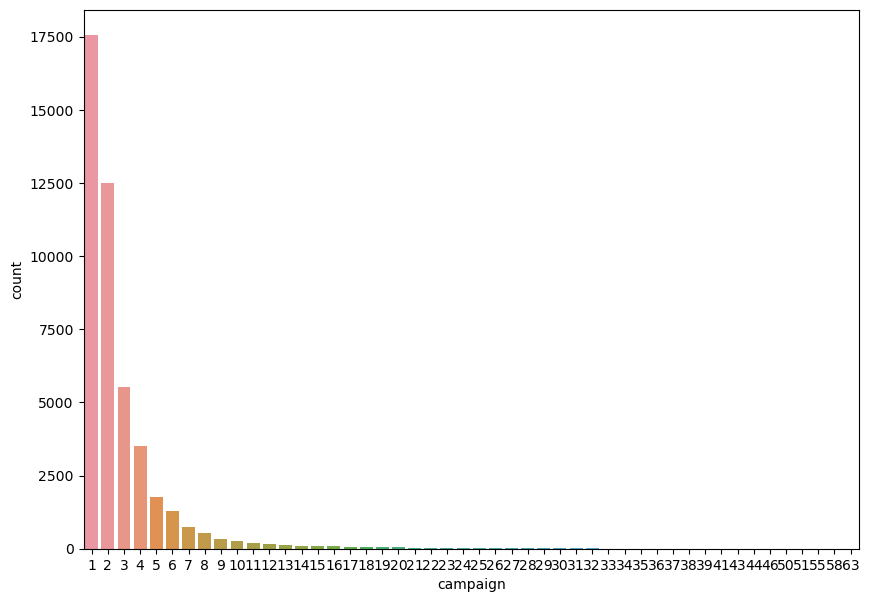

In [134]:
high_frequency('campaign')

In [135]:
yes = df[df['y']== 'yes'].campaign.value_counts(normalize =True)*100
no = df[df['y']== 'no'].campaign.value_counts(normalize = True)*100

print(' in the campaign do deposits:' '\n', yes)

print('\n')

print('in the campaign not do deposits:','\n', no)

 in the campaign do deposits:
 1     48.421252
2     26.488939
3     11.684628
4      5.993572
5      2.628096
6      1.739459
7      0.888637
8      0.605029
9      0.397050
11     0.302515
10     0.264700
17     0.113443
13     0.113443
15     0.075629
12     0.075629
14     0.075629
16     0.037814
32     0.018907
24     0.018907
29     0.018907
21     0.018907
20     0.018907
Name: campaign, dtype: float64


in the campaign not do deposits: 
 1     37.530685
2     27.814238
3     12.281449
4      8.028155
5      4.070437
6      3.003357
7      1.723361
8      1.272481
9      0.766495
10     0.631231
11     0.463404
12     0.378238
13     0.318120
14     0.222935
15     0.200391
16     0.192876
17     0.157808
18     0.127749
19     0.110215
20     0.105205
21     0.085166
22     0.057612
25     0.055107
23     0.055107
24     0.047593
28     0.040078
29     0.037573
26     0.032563
31     0.030059
27     0.025049
32     0.020039
30     0.020039
33     0.015029
34     0.012524
36   

# OBSERVATIONS FROM DURATIONS:

# MODEL BUILDING

In [136]:
x= df.iloc[:,:-1]
y = df['y']

In [137]:
x_encoded = pd.get_dummies(x, drop_first=True)
x_encoded

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
45207,71,1729,17,456,2,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
45208,72,5715,17,1127,5,184,3,0,0,0,...,0,0,0,0,1,0,0,0,1,0
45209,57,668,17,508,4,-1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1


In [138]:
# to fit the numeric column into standard values
scaler = StandardScaler()
scaler.fit(x_encoded)

StandardScaler()

In [139]:
x1 = scaler.fit_transform(x_encoded)

In [140]:
x_train, x_test, y_train, y_test = train_test_split(x1, y, test_size=0.3, random_state=45)

In [146]:
models = model_build(x_train,y_train)
models

{'logis': LogisticRegression(),
 'decision tree': DecisionTreeClassifier(criterion='entropy'),
 'random_forest': RandomForestClassifier(n_estimators=10)}

In [145]:
results(x_train, x_test, y_train, y_test, models)

training results logis
              precision    recall  f1-score   support

          no       0.92      0.98      0.95     27921
         yes       0.65      0.34      0.45      3726

    accuracy                           0.90     31647
   macro avg       0.78      0.66      0.70     31647
weighted avg       0.89      0.90      0.89     31647

Confusion matrix
/n
[[27243   678]
 [ 2465  1261]]
Test Results
              precision    recall  f1-score   support

          no       0.92      0.98      0.95     12001
         yes       0.65      0.34      0.45      1563

    accuracy                           0.90     13564
   macro avg       0.79      0.66      0.70     13564
weighted avg       0.89      0.90      0.89     13564

Confusion matrix
[[11715   286]
 [ 1027   536]]
---------------------------------------------------
training results decision tree
              precision    recall  f1-score   support

          no       1.00      1.00      1.00     27921
         yes       

In [147]:
# Logistic performs well